In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

# Data Quality and Preparation Part

In [2]:
customer = r"C:\Users\SMangal\Downloads\dataset\Finance_new_bike\customers.csv"
loan = r"C:\Users\SMangal\Downloads\dataset\Finance_new_bike\loans.csv"
transaction = r"C:\Users\SMangal\Downloads\dataset\Finance_new_bike\transactions.csv"
apps = r"C:\Users\SMangal\Downloads\dataset\Finance_new_bike\applications.csv"
branch = r"C:\Users\SMangal\Downloads\dataset\Finance_new_bike\branches.csv"
defaults = r"C:\Users\SMangal\Downloads\dataset\Finance_new_bike\defaults.csv"

In [3]:
pd_customer = pd.read_csv(customer,encoding='utf-8')
pd_loan = pd.read_csv(loan, encoding = 'utf-8')
pd_transaction = pd.read_csv(transaction, encoding = 'utf-8')
pd_applications = pd.read_csv(apps, encoding = 'utf-8',low_memory = False)
pd_branch = pd.read_csv(branch,encoding = 'utf-8')
pd_defaults = pd.read_csv(defaults,encoding = 'utf-8')

In [4]:
pd_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    82600 non-null  object
 1   Loan_ID           70000 non-null  object
 2   Customer_ID       82600 non-null  object
 3   Application_Date  82600 non-null  object
 4   Approval_Date     70000 non-null  object
 5   Loan_Purpose      82600 non-null  object
 6   Source_Channel    82600 non-null  object
 7   Processing_Fee    82600 non-null  int64 
 8   Approval_Status   82600 non-null  object
 9   Rejection_Reason  12600 non-null  object
dtypes: int64(1), object(9)
memory usage: 6.3+ MB


In [5]:
# print(f"{pd_customer.info()},{pd_loan.info()},{pd_transaction.info()},{pd_applications.info()},{pd_branch.info()},{pd_defaults.info()}")

```python
import pandas as pd

# Create a sample DataFrame
df = pd.DataFrame(pd_defaults.head())

# Export the DataFrame to a CSV file
df.to_csv('pd_defaults.csv', index=False)
```


In [6]:
# pd_customer.head()

``` python
import pandas as pd

# Create sample DataFrames
# Create an ExcelWriter object
with pd.ExcelWriter('output.xlsx') as writer:
    # Write each DataFrame to a different sheet
    pd_customer.head().to_excel(writer, sheet_name='customer', index=False)
    pd_loan.head().to_excel(writer, sheet_name='loan', index=False)
    pd_transaction.head().to_excel(writer, sheet_name='transactions', index=False)
    pd_applications.head().to_excel(writer, sheet_name='applications', index=False)
    pd_branch.head().to_excel(writer,sheet_name = 'branch',index = False)
    pd_defaults.head().to_excel(writer,sheet_name = 'defaults',index = False)

```

In [7]:
customer_na = pd_customer.isna().sum()
customer_null = pd_customer.isnull().sum()
loan_na = pd_loan.isna().sum()
loan_null = pd_loan.isnull().sum()
tansaction_na = pd_transaction.isna().sum()
transaction_null = pd_transaction.isna().sum()
branch_na = pd_branch.isna().sum()
branch_null = pd_branch.isnull().sum()
defaults_na = pd_defaults.isna().sum()
defaults_null = pd_defaults.isnull().sum()
apps_na = pd_applications.isna().sum()
apps_null = pd_applications.isnull().sum()

Axes(0.125,0.11;0.775x0.77)


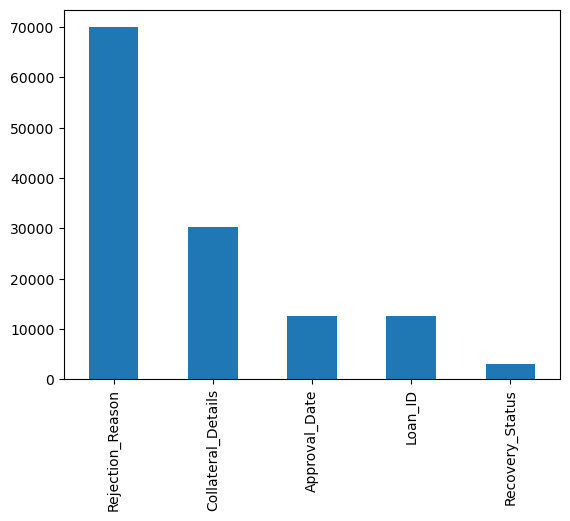

In [8]:
count_list = [customer_na,customer_null,loan_na,loan_null,tansaction_na,transaction_null,branch_na,branch_null,defaults_na,defaults_null,apps_na,apps_null]
cdf = pd.DataFrame(count_list)
# colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black", "purple", "orange", "pink"]
# titles = ["Customer NA","Customer Null","Loan NA","Loan Null","Transaction NA","Transaction Null","Branch NA","Branch Null","Defaults NA","Defaults Null"]
print(cdf.max().sort_values(ascending = False).head().plot(kind='bar'))
# cdf.describe()

In [9]:
# pd_loan.iloc[:,[0,1,5,6,7,11]].head() # update dates to date time format
# pd_transaction.iloc[:,[3]].head() # update dates to date time format
# pd_branch.iloc[:].head() # No Changes in format needed
# pd_defaults.iloc[:].head() # update dates to date time format # missing values like amount recovered by entry is incorrect
# pd_customer.iloc[:].head() # no changes as of now required
# pd_applications.iloc[:,[3,4]].head() # udpate dates to these columns

<Axes: >

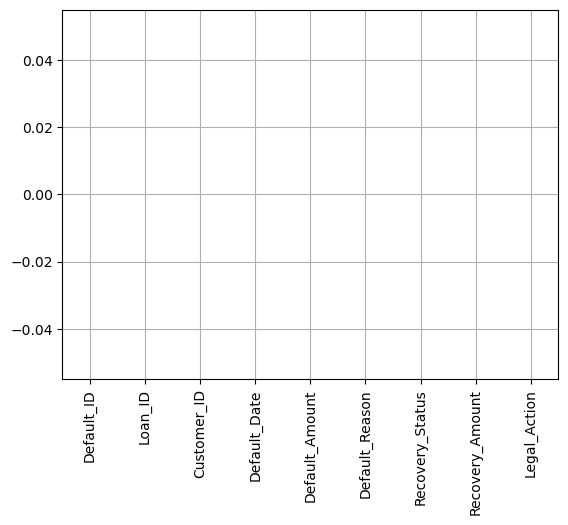

In [10]:
df = pd_defaults
df['Recovery_Status'] = df.apply(lambda x: "Partial" if (x['Default_Amount'] - x['Recovery_Amount'] > 0 and x['Recovery_Amount'] != 0 ) else ("Not Paid" if x['Recovery_Amount'] == 0 else "FullyPaid"), axis = 1)
# pd_defaults.info()
pd_defaults.isna().sum().plot(kind = 'bar',grid = True)

In [11]:
pd_loan['Collateral_Details'] = pd_loan['Collateral_Details'].fillna("Non-Collateral")

Axes(0.125,0.11;0.775x0.77)


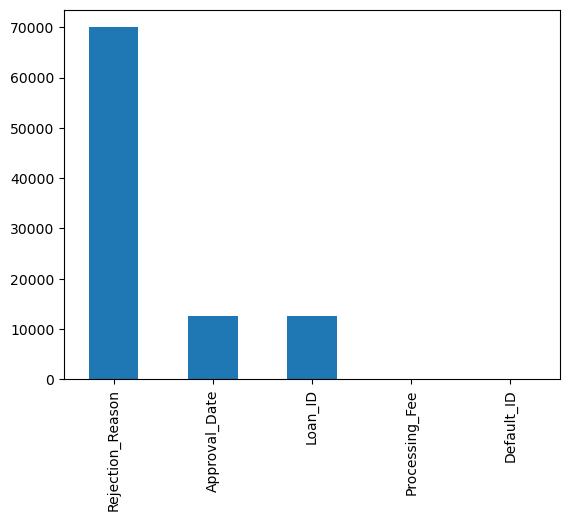

In [12]:
customer_na = pd_customer.isna().sum()
customer_null = pd_customer.isnull().sum()
loan_na = pd_loan.isna().sum()
loan_null = pd_loan.isnull().sum()
tansaction_na = pd_transaction.isna().sum()
transaction_null = pd_transaction.isna().sum()
branch_na = pd_branch.isna().sum()
branch_null = pd_branch.isnull().sum()
defaults_na = pd_defaults.isna().sum()
defaults_null = pd_defaults.isnull().sum()
apps_na = pd_applications.isna().sum()
apps_null = pd_applications.isnull().sum()

count_list = [customer_na,customer_null,loan_na,loan_null,tansaction_na,transaction_null,branch_na,branch_null,defaults_na,defaults_null,apps_na,apps_null]
cdf = pd.DataFrame(count_list)
# colors = ["blue", "green", "red", "cyan", "magenta", "yellow", "black", "purple", "orange", "pink"]
# titles = ["Customer NA","Customer Null","Loan NA","Loan Null","Transaction NA","Transaction Null","Branch NA","Branch Null","Defaults NA","Defaults Null"]
print(cdf.max().sort_values(ascending = False).head().plot(kind='bar'))
# cdf.describe()

In [13]:
pd_loan.iloc[:,[0,1,5,6,7,11]].head() # update dates to date time format
# pd_transaction.iloc[:,[3]].head() # update dates to date time format
# pd_branch.iloc[:].head() # No Changes in format needed
# pd_defaults.iloc[:].head() # update dates to date time format # missing values like amount recovered by entry is incorrect
# pd_customer.iloc[:].head() # no changes as of now required
# pd_applications.iloc[:,[3,4]].head() # udpate dates to these columns

Loan_ID Customer_ID Disbursal_Date Repayment_Start_Date Repayment_End_Date  \
0  L000001     C045929     2023-03-25           2023-04-25         2025-03-25   
1  L000002     C038991     2023-10-23           2023-11-23         2027-10-23   
2  L000003     C046662     2024-07-30           2024-08-30         2026-07-30   
3  L000004     C040268     2024-11-22           2024-12-22         2026-11-22   
4  L000005     C067057     2024-03-30           2024-04-30         2027-03-30   

  Collateral_Details  
0           Property  
1           Property  
2     Non-Collateral  
3     Non-Collateral  
4     Non-Collateral

In [14]:
print(pd_transaction.info())
ddup_d = pd_transaction = pd_transaction.drop_duplicates(subset='Transaction_ID', keep='first')
print(ddup_d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495000 entries, 0 to 494999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Transaction_ID     495000 non-null  object
 1   Loan_ID            495000 non-null  object
 2   Customer_ID        495000 non-null  object
 3   Transaction_Date   495000 non-null  object
 4   Payment_Type       495000 non-null  object
 5   Amount             495000 non-null  int64 
 6   Overdue_Fee        495000 non-null  int64 
 7   Remaining_Balance  495000 non-null  int64 
 8   Mode_of_Payment    495000 non-null  object
dtypes: int64(3), object(6)
memory usage: 34.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495000 entries, 0 to 494999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Transaction_ID     495000 non-null  object
 1   Loan_ID            495000 non-null  object
 2  

In [15]:
# df.iloc[:, :] = df.iloc[:, :].apply(pd.to_datetime)
# pd_loan.iloc[:,[0,1,5,6,7,11]].head() # complted date time format.
# pd_transaction.iloc[:,[3]].apply(pd.to_datetime) # Completed date time format conversion.
# pd_branch.iloc[:].head() # No Changes in format needed
# pd_defaults.iloc[:].head() # updated dates to date time format # missing values like amount recovered by entry is updated 
# pd_customer.iloc[:].head() # no changes as of now required
# pd_applications.iloc[:,[3,4]].head() # udpate dates to these columns

In [16]:
# pd.to_datetime(pd_loan[["Disbursal_Date","Repayment_Start_Date","Repayment_End_Date"]]) ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [17]:
pd_loan.Disbursal_Date = pd.to_datetime(pd_loan.Disbursal_Date) # run only once else NaT error appears

In [18]:
pd_loan.Repayment_Start_Date = pd.to_datetime(pd_loan.Repayment_Start_Date) # run only once else NaT error appears

In [19]:
pd_loan.Repayment_End_Date = pd.to_datetime(pd_loan.Repayment_End_Date) # run only once else NaT error appears

In [20]:
pd_transaction.iloc[:,[3]].apply(pd.to_datetime).info() # update dates to date time format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495000 entries, 0 to 494999
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_Date  495000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.8 MB


In [21]:
pd_defaults.iloc[:,3].apply(pd.to_datetime).info() # update dates to date time format # missing values like amount recovered by entry is updated.

<class 'pandas.core.series.Series'>
RangeIndex: 9000 entries, 0 to 8999
Series name: Default_Date
Non-Null Count  Dtype         
--------------  -----         
9000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 70.4 KB


In [22]:
pd_applications.iloc[:,[3,4]].apply(pd.to_datetime).info() # udpate dates to these columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Application_Date  82600 non-null  datetime64[ns]
 1   Approval_Date     70000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.3 MB


In [23]:
print(f"Before we proceed on the data frame to understand customer requirement let's find out the duplicated data in the dataset")
print(f"The duplicated count in loan table is {pd_loan.duplicated().sum()}")
print(f"The duplicated count in Transaction table is {pd_transaction.duplicated().sum()}")
print(f"The duplicated count in branch table is {pd_branch.duplicated().sum()}")
print(f"The duplicated count in customer table is {pd_customer.duplicated().sum()}")
print(f"The duplicated count in defaults table is {pd_defaults.duplicated().sum()}")
print(f"The duplicated count in application table is {pd_applications.duplicated().sum()}")

if (pd_applications.duplicated().sum()+pd_loan.duplicated().sum()+pd_transaction.duplicated().sum()+pd_branch.duplicated().sum()+pd_customer.duplicated().sum()+pd_defaults.duplicated().sum()) > 0:
    print("\nThere are duplicates")
else:
    print("\nNo Duplicates")

Before we proceed on the data frame to understand customer requirement let's find out the duplicated data in the dataset
The duplicated count in loan table is 0
The duplicated count in Transaction table is 0
The duplicated count in branch table is 0
The duplicated count in customer table is 0
The duplicated count in defaults table is 0
The duplicated count in application table is 0

No Duplicates


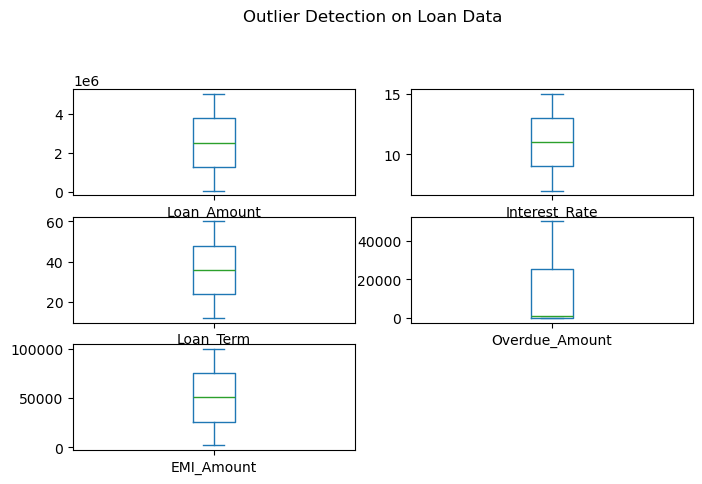

No Outliers Detected using visual of box plot


In [24]:
# Detection of outliers
pd_loan.plot(kind = 'box',subplots = True,title = 'Outlier Detection on Loan Data',layout=(5,2),figsize = (8,8))
plt.grid()
plt.show()

print("No Outliers Detected using visual of box plot")
# ValueError: his is not a valid plot kind Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

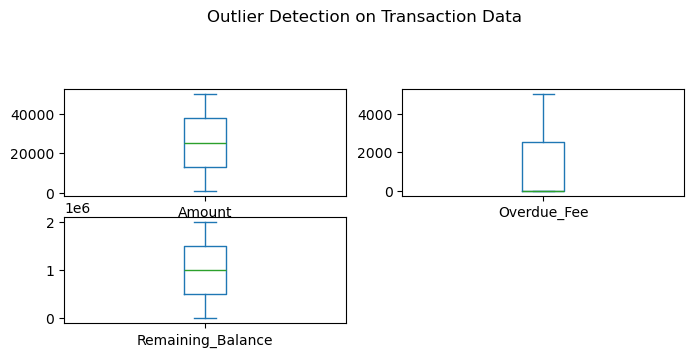

No Outliers Detected using visual of box plot


In [25]:
# Detection of outliers
pd_transaction.plot(kind = 'box',subplots = True,title = 'Outlier Detection on Transaction Data',layout=(5,2),figsize = (8,8))
plt.grid()
plt.show()

print("No Outliers Detected using visual of box plot")

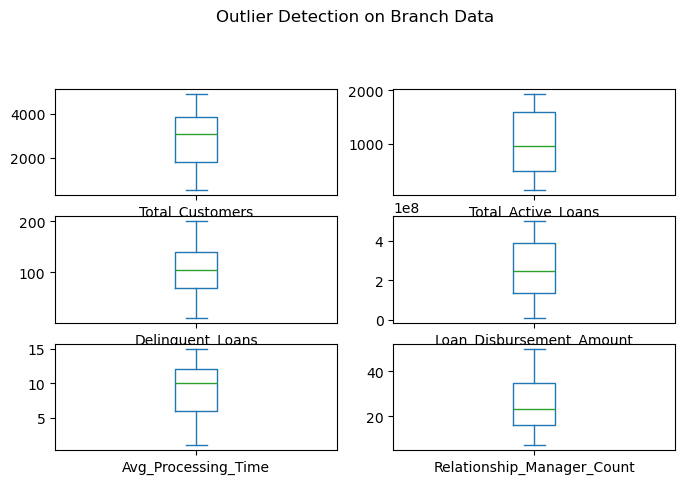

No Outliers Detected using visual of box plot


In [26]:
# Detection of outliers
pd_branch.plot(kind = 'box',subplots = True,title = 'Outlier Detection on Branch Data',layout=(5,2),figsize = (8,8))
plt.grid()
plt.show()

print("No Outliers Detected using visual of box plot")

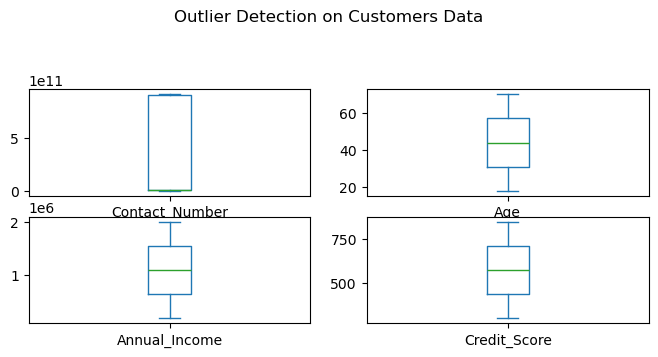

No Outliers Detected using visual of box plot


In [27]:
# Detection of outliers
pd_customer.plot(kind = 'box',subplots = True,title = 'Outlier Detection on Customers Data',layout=(5,2),figsize = (8,8))
plt.grid()
plt.show()

print("No Outliers Detected using visual of box plot")

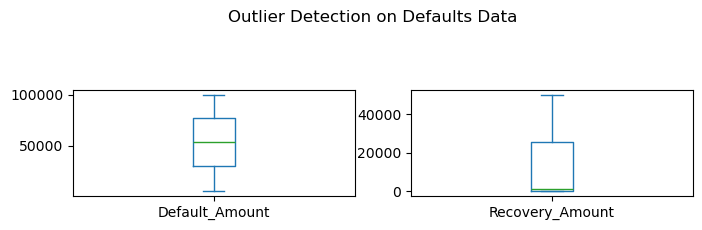

No Outliers Detected using visual of box plot


In [28]:
# Detection of outliers
pd_defaults.plot(kind = 'box',subplots = True,title = 'Outlier Detection on Defaults Data',layout=(5,2),figsize = (8,8))
plt.grid()
plt.show()

print("No Outliers Detected using visual of box plot")

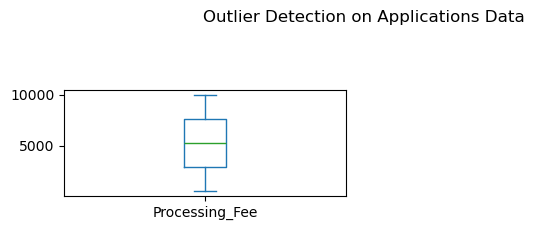

No Outliers Detected using visual of box plot


In [29]:
# Detection of outliers
pd_applications.plot(kind = 'box',subplots = True,title = 'Outlier Detection on Applications Data',layout=(5,2),figsize = (8,8))
plt.grid()
plt.show()

print("No Outliers Detected using visual of box plot")

# 2. Descriptive Analysis

In [30]:
# Summarize and visualize key metrics
# Distribution of Loan_Amount, EMI_Amount, and Credit_Score.
# Regional trends in loan disbursement and defaults.
# Monthly trends in loan approvals and disbursements.

In [31]:
# pd_loan.Loan_Amount.astype(int)
# pd_loan.Loan_Amount.plot(kind = 'box')
# pd_loan.columns.tolist(),pd_transaction.columns.tolist(),pd_branch.columns.tolist(),pd_customer.columns.tolist(),pd_defaults.columns.tolist(),pd_applications.columns.tolist()

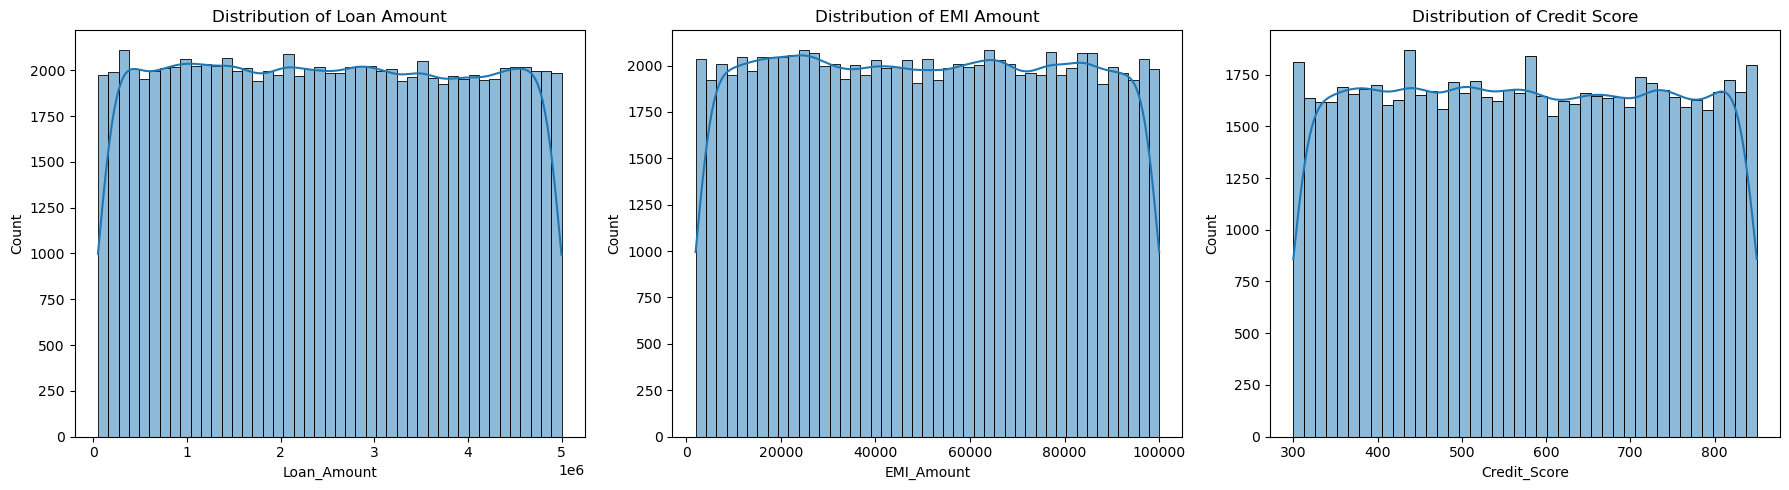

C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\4261725362.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\4261725362.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


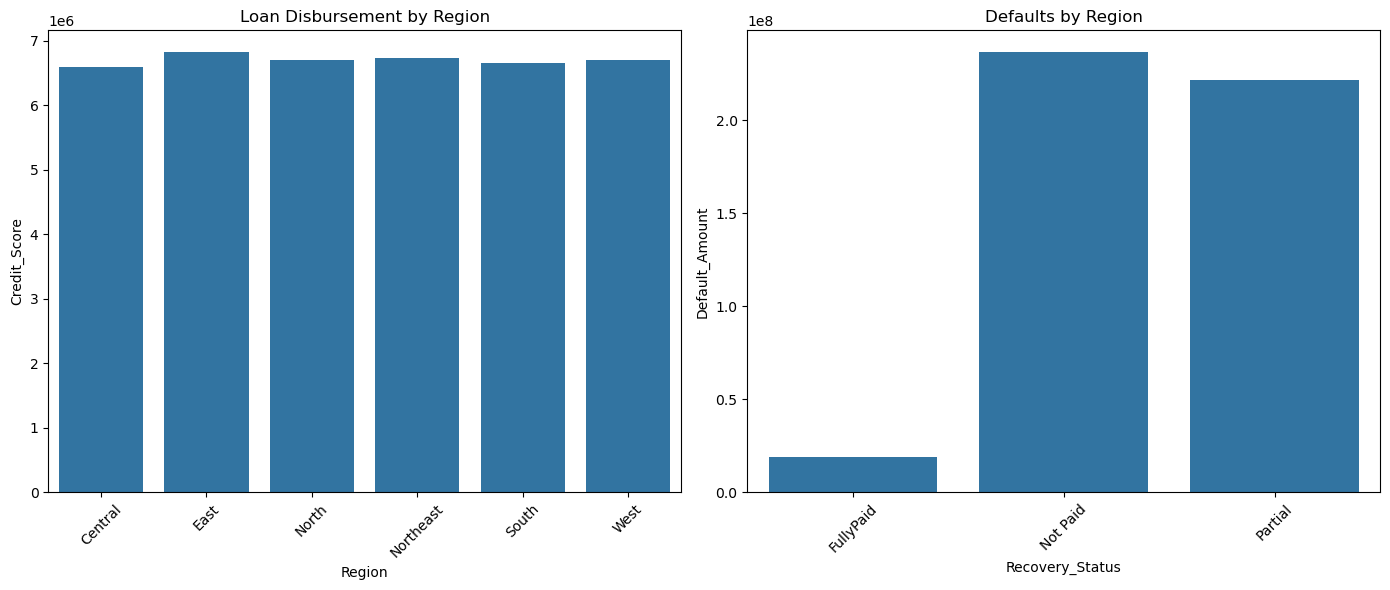

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant data
loan_data = pd_loan['Loan_Amount']
customer_data = pd_customer['Customer_ID']
default_data = pd_defaults['Default_Amount']

# Distribution of Loan_Amount, EMI_Amount, and Credit_Score
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(pd_loan['Loan_Amount'], kde=True)
plt.title('Distribution of Loan Amount')

plt.subplot(1, 3, 2)
sns.histplot(pd_loan['EMI_Amount'], kde=True)
plt.title('Distribution of EMI Amount')

plt.subplot(1, 3, 3)
sns.histplot(pd_customer['Credit_Score'], kde=True)
plt.title('Distribution of Credit Score')

plt.tight_layout()
plt.show()

# Regional trends in loan disbursement and defaults
loan_disbursement_by_region = pd_customer.groupby('Region')['Credit_Score'].sum().reset_index()
defaults_by_region = pd_defaults.groupby('Recovery_Status')['Default_Amount'].sum().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Region', y='Credit_Score', data=loan_disbursement_by_region, ax=ax[0])
ax[0].set_title('Loan Disbursement by Region')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(x='Recovery_Status', y='Default_Amount', data=defaults_by_region, ax=ax[1])
ax[1].set_title('Defaults by Region')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()




**ANALYSIS RESULT** : Loan Distribution across the regions are normal distribution and there are no skewness in the data.
Each Region have similar credit score of customers. So Credit score don't change out come of loan repayment. When comparing it with recovery_status.
we have very few Fully paid loans and not paid loans are equally higher compared to partial payment. This must be due to other values.

# 3. Default Risk Analysis

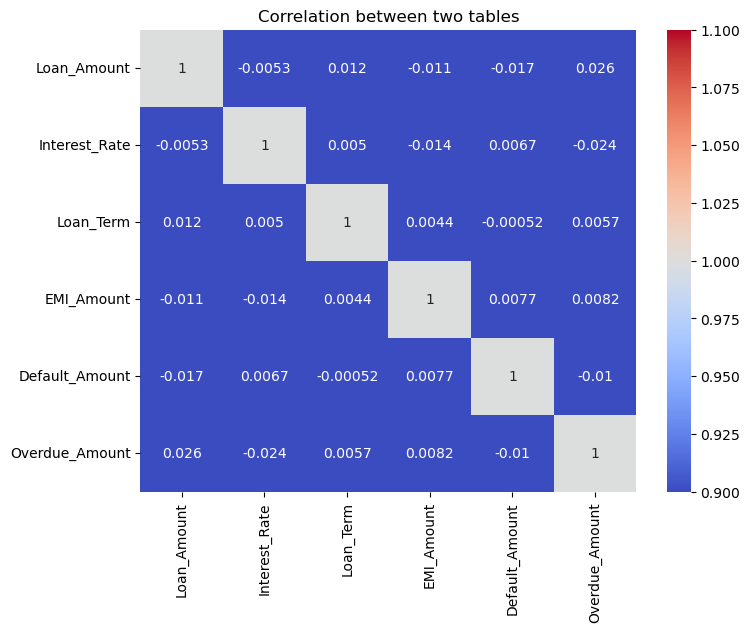

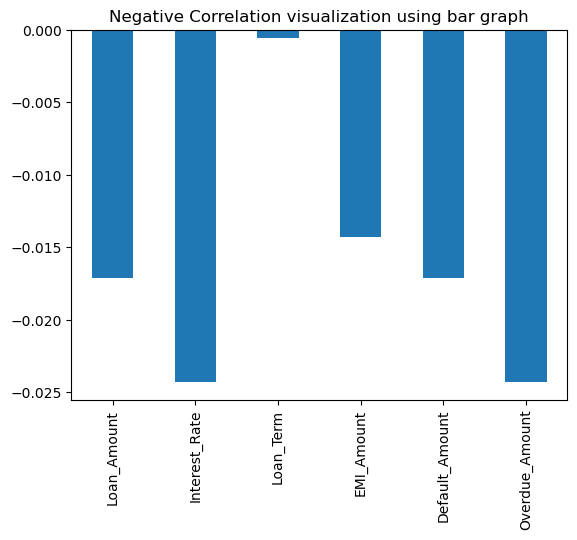

In [33]:
# Correlation Between Loan Attributes and Defaults
# we need to merge loan and defaults table based on loan id

ldf = pd_loan
rdf = pd_defaults
cols = ['Loan_ID']
op = pd.merge(ldf,rdf,left_on = cols,right_on = cols,how = 'inner', indicator = True)
# op[op['_merge']=='Left Only']
op['Default_Flag'] = op['Default_Amount'].apply(lambda x : 1 if x > 0 else 0)

# print(op.head())

# Now do a correlation
corr_matrix = op[['Loan_Amount','Interest_Rate','Loan_Term','EMI_Amount','Default_Amount','Overdue_Amount']].corr()

plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = 1, vmax = 1)
plt.title('Correlation between two tables',fontsize = 12)
plt.show()

corr_matrix.describe().min().plot(kind = 'bar')
plt.title("Negative Correlation visualization using bar graph", fontsize = 12)
plt.show()

# print(corr_matrix)

**Aalysis :** Based on headmap and corr_matrix Loan amount and Default amount have weak with negative correlation.

* **Loan_Amount and Default_Amount (-0.017102)**: *There is a very weak negative correlation between loan amount and default amount, suggesting that higher loan amounts are slightly associated with lower default amounts. However, the correlation is very weak, indicating that loan amount does not significantly impact defaults.*
* **Interest_Rate and Default_Amount (0.006651)**: *There is a very weak positive correlation between interest rate and default amount, suggesting that higher interest rates are slightly associated with higher default amounts. Again, the correlation is very weak, indicating that interest rate does not significantly impact defaults.*
* **Loan_Term and Default_Amount (-0.000523):** *There is no correlation between loan term and default amount, indicating that the length of the loan term does not impact defaults.*

* **EMI_Amount and Default_Amount (0.007650):** *There is a very weak positive correlation between EMI amount and default amount, suggesting that higher EMI amounts are slightly associated with higher default amounts. However, the correlation is very weak, indicating that EMI amount does not significantly impact defaults.*

**RESULTS :** This suggests that other factors, possibly related to customer behavior or external economic conditions, may play a more significant role in determining defaults.

In [34]:
# Below are the merged dataframes with at least one matching columns.

ldf0 = pd_applications
rdf0 = pd_customer
col0 = ['Customer_ID']
op0 = pd.merge(ldf0,rdf0,left_on = col0,right_on = col0, how = 'inner',indicator = True)
# op = op[op['_merged']=='left_only']
op0

ldf1 = pd_customer
rdf1 = pd_branch
col = ['Region']
op1 = pd.merge(ldf1,rdf1,left_on = col,right_on = col, how = 'inner',indicator = True)
# op1 = op1[op1['_merge']=='right_only']
op1

ldf2 = pd_defaults
rdf2 = pd_customer
col = ['Customer_ID']
op2 = pd.merge(ldf2,rdf2,left_on = col,right_on = col, how = 'inner',indicator = True)
# op = op[op['_merged']== 'left_only']
op2

ldf3 = pd_defaults
rdf3 = pd_loan
col = ['Loan_ID']
op3 = pd.merge(ldf3,rdf3,left_on = col,right_on = col, how = 'inner',indicator = True)
# op = op[op['_merged']== 'left_only']
op3

ldf4 = pd_loan
rdf4 = pd_customer
col = ['Customer_ID']
op4 = pd.merge(ldf4,rdf4,left_on = col,right_on = col, how = 'inner',indicator = True)
# op = op[op['_merged']== 'left_only']
op4

ldf5 = pd_transaction
rdf5 = pd_customer
col = ['Customer_ID']
op5 = pd.merge(ldf5,rdf5,left_on = col,right_on = col, how = 'inner',indicator = True)
# op = op[op['_merged']== 'left_only']
op5

ldf6 = pd_transaction
rdf6 = pd_loan
col = ['Loan_ID']
op6 = pd.merge(ldf6,rdf6,left_on = col,right_on = col, how = 'inner',indicator = True)
# op6 = op[op['_merged']== 'left_only']
op6

Transaction_ID  Loan_ID Customer_ID_x Transaction_Date Payment_Type  \
0           T00000001  L005588       C050792       2021-04-30          EMI   
1           T00000002  L019942       C008919       2021-12-14      Penalty   
2           T00000003  L014848       C016745       2021-01-26          EMI   
3           T00000004  L041104       C039957       2021-02-18      Penalty   
4           T00000005  L002488       C056156       2024-12-07      Penalty   
...               ...      ...           ...              ...          ...   
494995      T00494996  L055926       C054663       2024-01-03      Penalty   
494996      T00494997  L026031       C028522       2021-10-09          EMI   
494997      T00494998  L085752       C029754       2022-09-30          EMI   
494998      T00494999  L082971       C040255       2020-08-02      Penalty   
494999      T00495000  L077174       C033095       2020-10-10          EMI   

        Amount  Overdue_Fee  Remaining_Balance Mode_of_Payment Customer_ID_y  \
0        46099         1313            1513669            NEFT       C050792   
1        43648         4852             901455             UPI       C008919   
2         1810            0            1922629            Cash       C016745   
3         8607          708             213581             UPI       C039957   
4        34720            0             411621             UPI       C056156   
...        ...          ...                ...             ...           ...   
494995    8224         1408            1826651             UPI       C054663   
494996   23139            0            1131430            NEFT       C028522   
494997   13056            0            1998124          Cheque       C029754   
494998   17856         3139             174916            IMPS       C040255   
494999   33264            0            1505932            IMPS       C033095   

        ...  Interest_Rate  Loan_Term  Disbursal_Date Repayment_Start_Date  \
0       ...           8.02         36      2024-10-18           2024-11-18   
1       ...          12.59         36      2023-04-20           2023-05-20   
2       ...           7.46         36      2021-03-05           2021-04-05   
3       ...           9.78         48      2021-04-27           2021-05-27   
4       ...          14.52         48      2022-10-18           2022-11-18   
...     ...            ...        ...             ...                  ...   
494995  ...           9.62         24      2023-08-06           2023-09-06   
494996  ...           9.50         60      2022-12-24           2023-01-24   
494997  ...          13.84         36      2023-07-20           2023-08-20   
494998  ...          13.12         12      2020-01-03           2020-02-03   
494999  ...          12.94         36      2024-07-16           2024-08-16   

       Repayment_End_Date Loan_Status Overdue_Amount  EMI_Amount  \
0              2027-10-18     Overdue          14799        4863   
1              2026-04-20      Active              0       81178   
2              2024-03-05      Closed              0       73980   
3              2025-04-27      Active              0       71609   
4              2026-10-18     Overdue              0       78188   
...                   ...         ...            ...         ...   
494995         2025-08-06      Active           3651       54860   
494996         2027-12-24     Overdue              0       17352   
494997         2026-07-20      Active              0       88804   
494998         2021-01-03      Active              0       17732   
494999         2027-07-16      Active          22401       79784   

        Collateral_Details _merge  
0                 Property   both  
1                 Property   both  
2                  Vehicle   both  
3           Non-Collateral   both  
4                  Vehicle   both  
...                    ...    ...  
494995      Non-Collateral   both  
494996      Non-Collateral   both  
494997      Non-Collateral   bo

In [35]:
# use op1 which is the only table directly connect branch data.
# ldf1 = pd_customer
# rdf1 = pd_branch
# col = ['Region']
# op1 = pd.merge(ldf1,rdf1,left_on = col,right_on = col, how = 'inner',indicator = True)
# # op = op[op['_merged']=='left_only']
op1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583166 entries, 0 to 583165
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Customer_ID                 583166 non-null  object  
 1   Full_Name                   583166 non-null  object  
 2   Contact_Number              583166 non-null  int64   
 3   Email                       583166 non-null  object  
 4   Address                     583166 non-null  object  
 5   Age                         583166 non-null  int64   
 6   Gender                      583166 non-null  object  
 7   Marital_Status              583166 non-null  object  
 8   Employment_Status           583166 non-null  object  
 9   Annual_Income               583166 non-null  int64   
 10  Credit_Score                583166 non-null  int64   
 11  Region                      583166 non-null  object  
 12  Account_Tenure              583166 non-null  object  
 13 

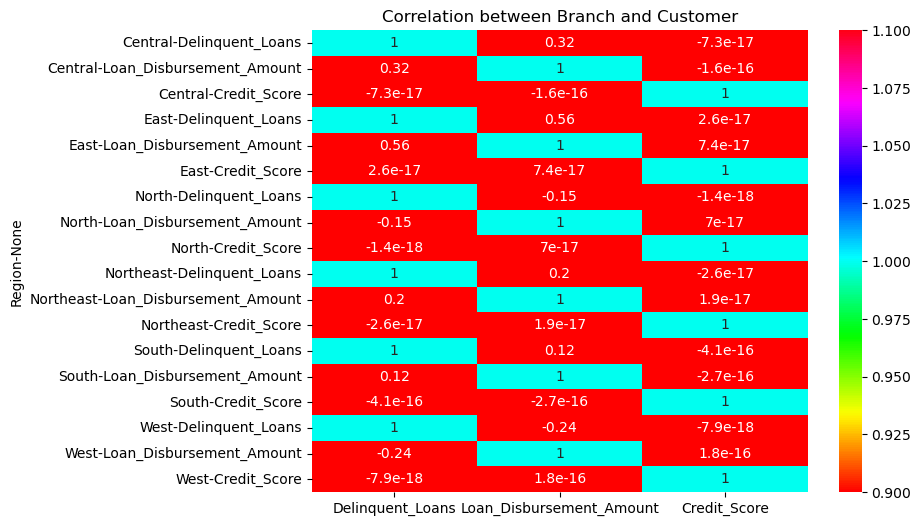

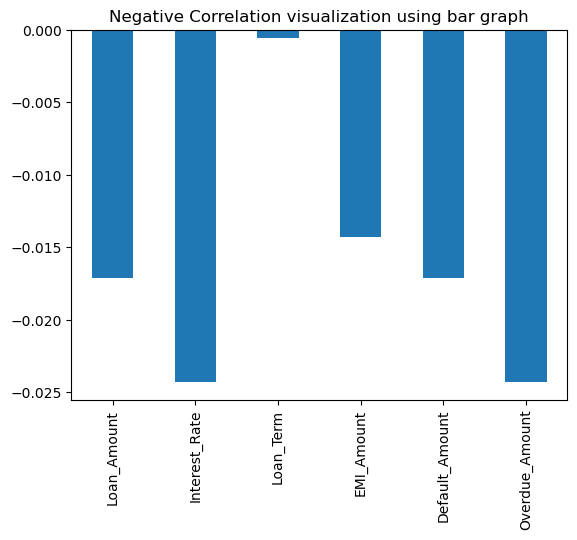

Most of the Values are very high negative correlation. Thus Defaults by Branch Region is not happening. It must be due to other parameters


In [36]:
# Now do a correlation
corr_matrix1 = op1.groupby('Region')[['Delinquent_Loans','Loan_Disbursement_Amount','Credit_Score']].corr()

plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix1, annot = True, cmap = 'hsv', vmin = 1, vmax = 1)
plt.title('Correlation between Branch and Customer',fontsize = 12)
plt.show()

corr_matrix.describe().min().plot(kind = 'bar')
plt.title("Negative Correlation visualization using bar graph", fontsize = 12)
plt.show()

print("Most of the Values are very high negative correlation. Thus Defaults by Branch Region is not happening. It must be due to other parameters")

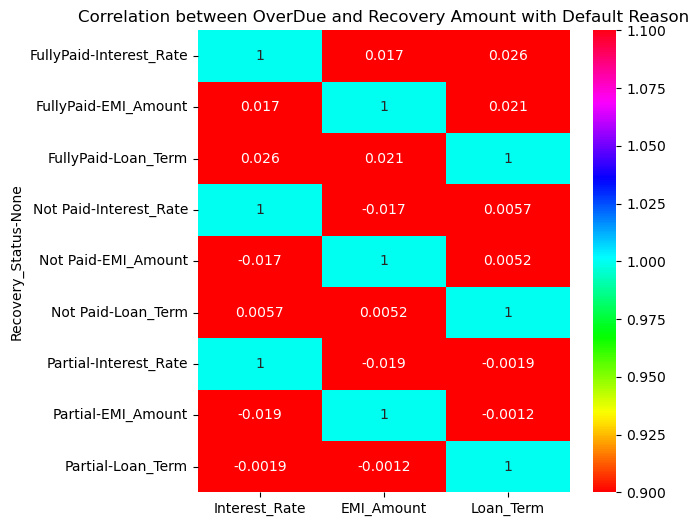

In [37]:
corr_matrix2 = op3.groupby('Recovery_Status')[['Interest_Rate','EMI_Amount','Loan_Term']].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_matrix2, annot = True, cmap = 'hsv', vmin = 1, vmax = 1)
plt.title('Correlation between OverDue and Recovery Amount with Default Reason',fontsize = 12)
plt.show()

In [38]:
print("EMI Amount, Loan_Term and Interest and positively corelated with Non Paid Recovery Status Category.")

EMI Amount, Loan_Term and Interest and positively corelated with Non Paid Recovery Status Category.


**=======================================================================================**

# 4) Branch and Regional Performance

* Rank branches by: *using ldf8 for highest loan defaults*
* Loan disbursement volume. (✅)
* Processing time efficiency.(✅)
* Default rates and recovery rates.(✅)
* Compare branch performance across regions.(✅ group by Region and branch id)


In [39]:
ldf8 = op1[op1['Delinquent_Loans'] >= op1['Delinquent_Loans'].unique().max()] # Highest Delienquent loans

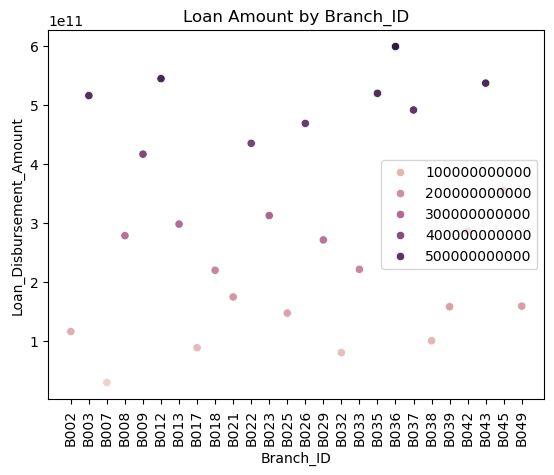

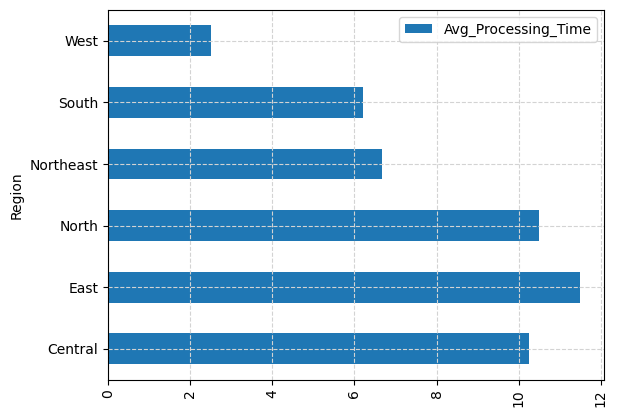

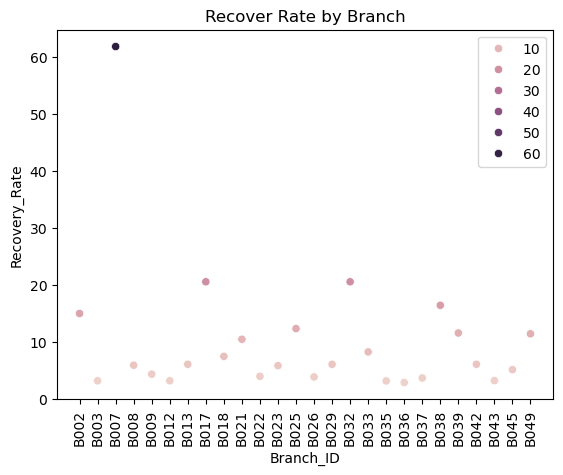

In [40]:
ldf8 = op1[op1['Delinquent_Loans'] >= op1['Delinquent_Loans'].unique().mean()] # Highest Delienquent loans
rdf8 = op3[['Customer_ID_x','Overdue_Amount']]
op7 = pd.merge(ldf8,rdf8,left_on = 'Customer_ID',right_on ='Customer_ID_x',how='inner')
# op7.info()
op7['Default_Rate'] = ((op7['Loan_Disbursement_Amount'] - op7['Overdue_Amount'])* 100 / op7['Loan_Disbursement_Amount'])
#Default Rates columns are added
op7['Loan_Ranks'] =op7['Loan_Disbursement_Amount'].rank(method='dense',na_option = 'bottom')
#recovery rate


# Loan Default Volume by Branch Loan disbursement volume. (✅)
sns.scatterplot(op7.groupby('Branch_ID')['Loan_Disbursement_Amount'].sum().reset_index(),
                x='Branch_ID',y='Loan_Disbursement_Amount',hue='Loan_Disbursement_Amount')
plt.xticks(rotation = 90)
plt.legend(loc = 'center right')
plt.title('Loan Amount by Branch_ID')
plt.show()

# Processing time efficiency.(✅)
op7.groupby('Region')['Avg_Processing_Time'].mean().reset_index().plot(kind = 'barh',x = 'Region',y='Avg_Processing_Time')
plt.xticks(rotation = 90)
plt.legend()
plt.grid(linestyle='--',color ='lightgrey')
plt.show()

ldf9 = ldf8
rdf9 = op3
op9 = pd.merge(ldf8,rdf9,left_on='Customer_ID',right_on='Customer_ID_x',how='inner')
op9['Recovery_Rate'] = (100*op9['Recovery_Amount']/ op9['Loan_Disbursement_Amount'])
op9.drop_duplicates(subset = 'Customer_ID', keep = 'first')

sns.scatterplot(op9.groupby('Branch_ID')['Recovery_Rate'].sum().reset_index(),x='Branch_ID',y='Recovery_Rate',hue ='Recovery_Rate')
plt.xticks(rotation = 90)
plt.legend()
plt.title('Recover Rate by Branch')
plt.show()

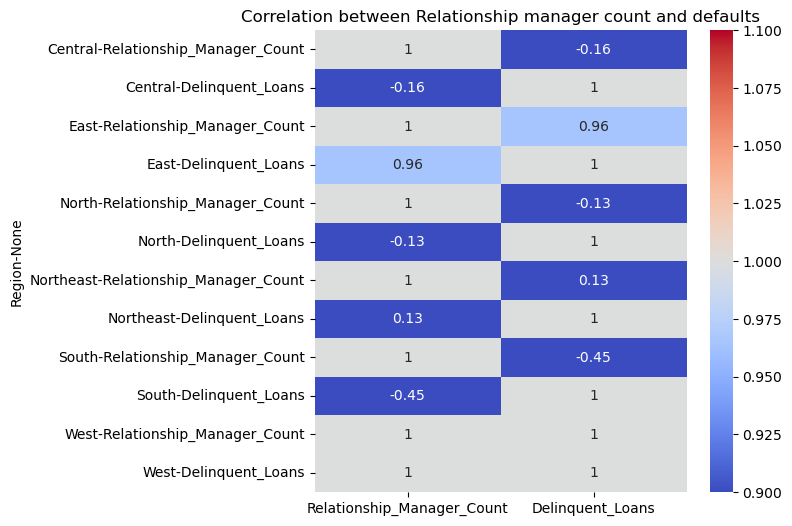

In [41]:
# Compare branch performance across regions
corr_matrix3 = op9.groupby('Region')[['Relationship_Manager_Count','Delinquent_Loans']].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_matrix3, annot = True, cmap = 'coolwarm', vmin = 1, vmax = 1)
plt.title('Correlation between Relationship manager count and defaults',fontsize = 12)
plt.show()

**RESUTL:** Found Positive Correlation for Relationship Manager count for that region and defaults. East Region is highest affected where recovery could be improved by increasing managers count. West Regions recovery is Better, Hence new products can be introduced here.

# 5. Customer Segmentation

5) Customer Segmentation
* Segment customers by income, credit score, and loan status.
* Identify high-risk and high-value customer groups.
* Analyze repayment behavior across segments.


In [42]:
# Customer Segment Based on Annual Income
mean_income = op2['Annual_Income'].mean()
op2['Salary_Segment'] = op2['Annual_Income'].apply(lambda x: 'Low' if x < mean_income else 'High')

In [43]:
# 574 is the median value for credit score.
mean_cc_score = op2['Credit_Score'].mean()
op2['Credit_Segment'] = op2['Credit_Score'].apply(lambda x:'Low' if x < mean_cc_score else "Good")

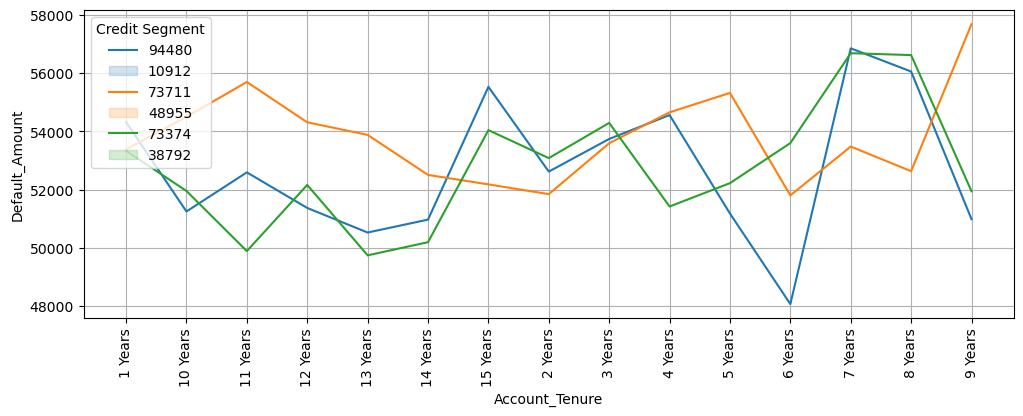

In [44]:
# Average of  paid Loan values and legal actoins
a = op2.query('Legal_Action =="No" and Recovery_Status == "Not Paid" ').groupby('Account_Tenure')['Default_Amount'].mean().reset_index()
b = op2.query('Legal_Action =="No" and Recovery_Status != "Not Paid" ').groupby('Account_Tenure')['Default_Amount'].mean().reset_index()
c = op2.query('Legal_Action =="Yes" and Recovery_Status != "Not Paid" ').groupby('Account_Tenure')['Default_Amount'].mean().reset_index()
plt.figure(figsize = (12,4))
sns.lineplot(a,x='Account_Tenure',y='Default_Amount')
sns.lineplot(b,x='Account_Tenure',y='Default_Amount')
sns.lineplot(c,x='Account_Tenure',y='Default_Amount')
plt.xticks(rotation = 90)
plt.legend(op2['Default_Amount'],title='Credit Segment',loc = 'upper left')
plt.grid()
plt.show()

In [45]:
# Identify high-risk and high-value customer groups.
high_value_customers = op2.query('Salary_Segment == "High" and Credit_Segment == "Good"').iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20,21]]
high_value_customers.sort_values(by = 'Annual_Income',ascending = False).head()

Full_Name  Contact_Number                         Email  \
5802    Hunar Vasa    911776012631               hansh45@sen.com   
2246  Khushi Swamy    912475813380       adira18@dhar-bhatia.org   
1044  Yashvi Datta      3173638095  advikavenkataraman@yahoo.com   
4608  Aarush Kunda      7069589377           dhanukrao@amble.com   
4208  Charvi Kalla      8013174234       deemir@raman-datta.info   

                                      Address  Age  Gender Marital_Status  \
5802                 537\nKala\nKollam-308930   66  Female       Divorced   
2246  H.No. 531, Bala Street\nParbhani 258226   38    Male         Single   
1044   H.No. 98\nRavel Chowk\nSuryapet-127669   49   Other         Single   
4608           58, Mallick Zila\nDelhi-305047   24    Male        Married   
4208          H.No. 34\nDin\nBerhampur 052551   25    Male        Married   

     Employment_Status  Annual_Income  Credit_Score     Region Account_Tenure  \
5802          Salaried        1998603           747       East        1 Years   
2246        Unemployed        1998186           672       West       11 Years   
1044          Salaried        1997289           770       East       12 Years   
4608          Salaried        1996700           702  Northeast       11 Years   
4208        Unemployed        1996623           716       East        2 Years   

     Relationship_Manager_ID  
5802                  RM0477  
2246                  RM0419  
1044                  RM0343  
4608                  RM0213  
4208                  RM0208

In [46]:
high_risk_customers = op2.query('Salary_Segment == "Low" and Credit_Segment == "Low"').iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20,21]]
high_risk_customers.sort_values(by = 'Annual_Income', ascending = True).head()

Full_Name  Contact_Number                       Email  \
5371   Shaan Upadhyay    916572910893      doratarini@hotmail.com   
6276       Adira Tata      3876188619          bmaharaj@yahoo.com   
6625   Mamooty Bhatti       942126800          jsarma@hotmail.com   
80    Stuvan Banerjee      8450793583  shayakdin@venkataraman.com   
3178    Yasmin Sankar    914700978628          eshani15@gmail.com   

                                       Address  Age Gender Marital_Status  \
5371  H.No. 99\nSawhney Circle, Sambhal 585215   39   Male         Single   
6276                 92\nDhillon, Noida-229188   40  Other       Divorced   
6625          23/25\nBali Path\nGwalior-219803   37  Other       Divorced   
80            H.No. 82\nKar Chowk\nLoni 511314   51  Other         Single   
3178       27/975, Gole Nagar, Gopalpur 358385   69   Male        Married   

     Employment_Status  Annual_Income  Credit_Score   Region Account_Tenure  \
5371        Unemployed         201041           361     West        6 Years   
6276          Salaried         201181           522    North        2 Years   
6625     Self-Employed         202169           528     East       10 Years   
80       Self-Employed         202386           407  Central        7 Years   
3178     Self-Employed         203273           460  Central        4 Years   

     Relationship_Manager_ID  
5371                  RM0250  
6276                  RM0103  
6625                  RM0330  
80                    RM0320  
3178                  RM0310

In [47]:
# import keyword
# print(keyword.kwlist)

In [48]:
# Analyze repayment behavior across segments.

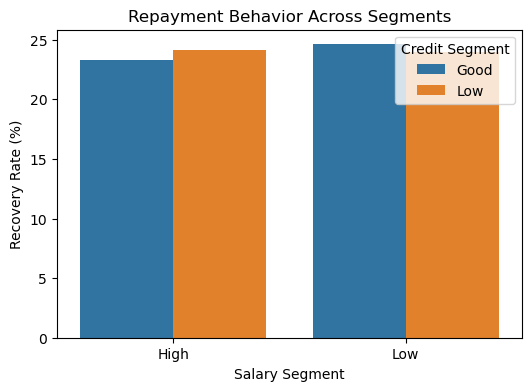

In [49]:
# Analyze repayment behavior across segments
repayment_behavior = op2.groupby(['Salary_Segment', 'Credit_Segment']).agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

repayment_behavior['Recovery_Rate_%'] = (repayment_behavior['Recovery_Amount'] / repayment_behavior['Default_Amount']) * 100
repayment_behavior

# Plot repayment behavior across segments
plt.figure(figsize=(6, 4))
sns.barplot(x='Salary_Segment', y='Recovery_Rate_%', hue='Credit_Segment', data=repayment_behavior)
plt.title('Repayment Behavior Across Segments')
plt.xlabel('Salary Segment')
plt.ylabel('Recovery Rate (%)')
plt.legend(title='Credit Segment')
plt.show()

# print(repayment_behavior)


# 6 Advanced Statistical Analysis

1) **Correlation Analysis for Default Risks:**
   
* Examine the correlation between :
  * Credit_Score - op4.21
  * Loan_Amount - op4.2
  * Interest_Rate - op4.3
  * Overdue_Amount and - op4.9
  * Default_Flag. - op.25


In [50]:
op0.drop('_merge',axis = 1).info()
op3.drop('_merge',axis = 1).info()
print('For filter using indicator drop previous _merge columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Application_ID           82600 non-null  object
 1   Loan_ID                  70000 non-null  object
 2   Customer_ID              82600 non-null  object
 3   Application_Date         82600 non-null  object
 4   Approval_Date            70000 non-null  object
 5   Loan_Purpose             82600 non-null  object
 6   Source_Channel           82600 non-null  object
 7   Processing_Fee           82600 non-null  int64 
 8   Approval_Status          82600 non-null  object
 9   Rejection_Reason         12600 non-null  object
 10  Full_Name                82600 non-null  object
 11  Contact_Number           82600 non-null  int64 
 12  Email                    82600 non-null  object
 13  Address                  82600 non-null  object
 14  Age                      82600 non-nul

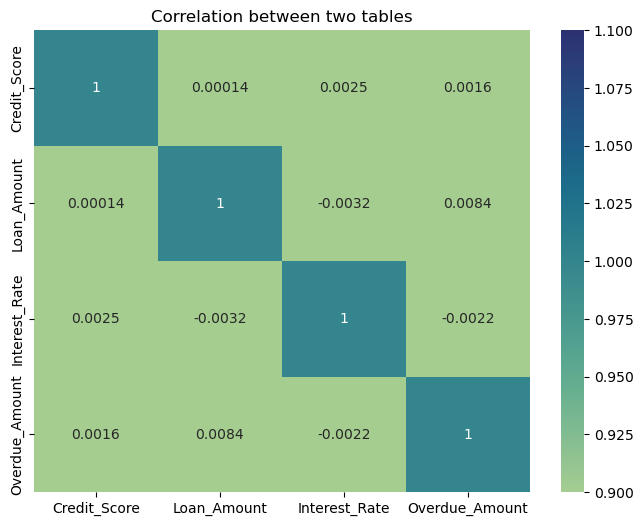

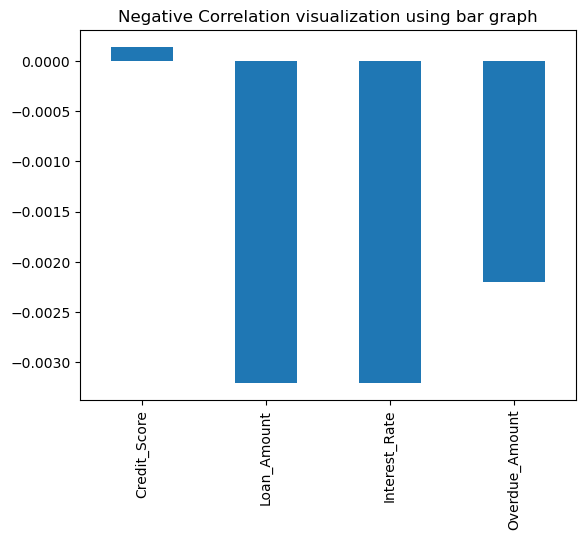

                Credit_Score  Loan_Amount  Interest_Rate  Overdue_Amount
Credit_Score        1.000000     0.000139       0.002457        0.001570
Loan_Amount         0.000139     1.000000      -0.003201        0.008400
Interest_Rate       0.002457    -0.003201       1.000000       -0.002199
Overdue_Amount      0.001570     0.008400      -0.002199        1.000000


In [51]:
# ldf10 = op0
# rdf10 = op3
# op8 = pd.merge(ldf10,rdf10,left_on = 'Customer_ID',right_on='Customer_ID_x',how = 'left')
# op8.isna().sum()


# op4.isna().sum()
# # print(op8.head())

# Now do a correlation
corr_matrix4 = op4[['Credit_Score','Loan_Amount','Interest_Rate','Overdue_Amount']].corr()

plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix4, annot = True, cmap = 'crest', vmin = 1, vmax = 1)
plt.title('Correlation between two tables',fontsize = 12)
plt.show()

corr_matrix4.describe().min().plot(kind = 'bar')
plt.title("Negative Correlation visualization using bar graph", fontsize = 12)
plt.show()

print(corr_matrix4)

**RESULT:** The correlations between *Credit_Score, Loan_Amount, Interest_Rate, and Overdue_Amount* are very weak, indicating that these values don't have a strong relationships with each other. As a result We need to look for other factors may affect a more significant value in determining default risks and repayment behavior. Such a Default Reason

2) Pairwise Correlation Heatmap:
* Generate a heatmap to visualize correlations among key variables
like EMI_Amount, Recovery_Rate, and Default_Amount.

In [52]:
# Default_Amount - op2,op3
#EMI_Amount - op3,op9
# Recovery_Rate - op9
# all the columns are in dataframe op9.columns.sort_values()

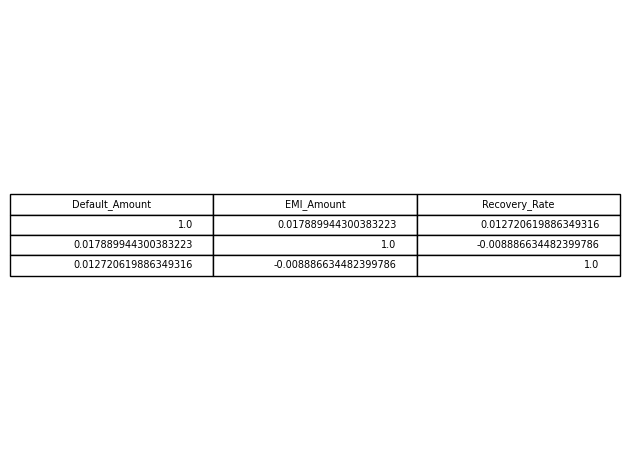

<Figure size 200x200 with 0 Axes>

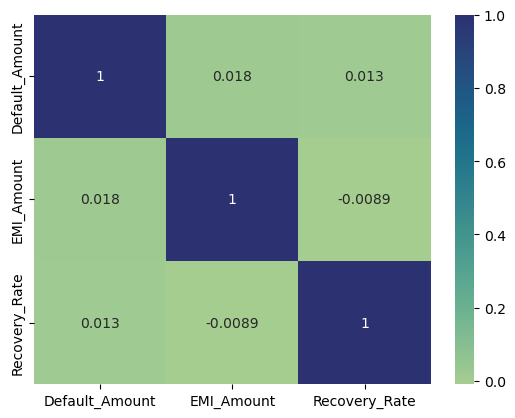

In [53]:
corr_matrix5 = op9[['Default_Amount','EMI_Amount','Recovery_Rate']].corr()
corr_matrix5

fig, ax = plt.subplots()
plt.figure(figsize = (2,2))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
df = corr_matrix5
ax.table(cellText=df.values, colLabels=df.columns, loc='center')
fig.tight_layout()
plt.show()

sns.heatmap(corr_matrix5,annot = True,cmap='crest')
plt.show()

In [54]:
corr_matrix5

Default_Amount  EMI_Amount  Recovery_Rate
Default_Amount        1.000000    0.017890       0.012721
EMI_Amount            0.017890    1.000000      -0.008887
Recovery_Rate         0.012721   -0.008887       1.000000

**Branch-Level Correlation:**
* Explore the relationship between branch performance metrics
(Delinquent_Loans, Loan_Disbursement_Amount, Recovery_Rate)
and overall efficiency.


<Axes: >

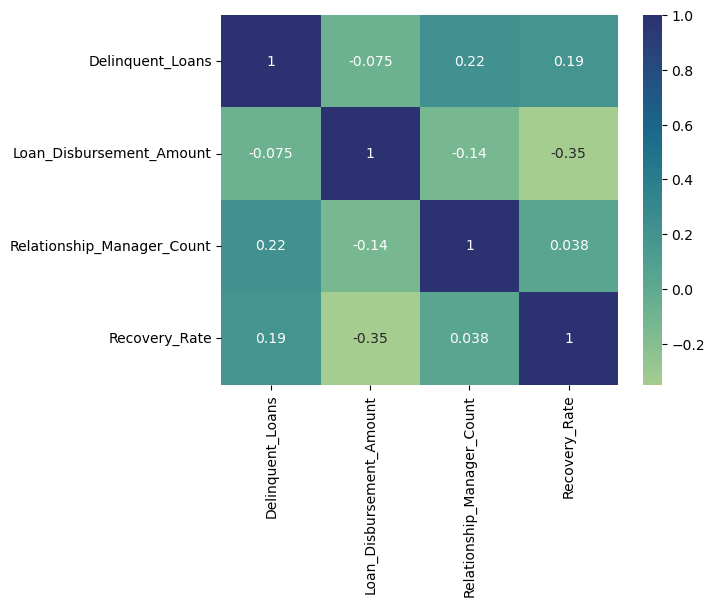

In [55]:
corr_matrix6 = op9[['Delinquent_Loans','Loan_Disbursement_Amount','Relationship_Manager_Count','Recovery_Rate']].corr()
sns.heatmap(corr_matrix6,annot = True,cmap = 'crest')

**RESULT:** Number of Relationship Manager on Branch show highest positive correlation with Delinquent_Loans and Recovery_Rate. Look for Manager's to customer rating and do correlation check again.

# 7 Transaction and Recovery Analysis

*  Analyze penalty payments and overdue trends

In [56]:
op9.columns.sort_values()

Index(['Account_Tenure', 'Address', 'Age', 'Annual_Income',
       'Avg_Processing_Time', 'Branch_ID', 'Branch_Name', 'Collateral_Details',
       'Contact_Number', 'Credit_Score', 'Customer_ID', 'Customer_ID_x',
       'Customer_ID_y', 'Default_Amount', 'Default_Date', 'Default_ID',
       'Default_Reason', 'Delinquent_Loans', 'Disbursal_Date', 'EMI_Amount',
       'Email', 'Employment_Status', 'Full_Name', 'Gender', 'Interest_Rate',
       'Legal_Action', 'Loan_Amount', 'Loan_Disbursement_Amount', 'Loan_ID',
       'Loan_Status', 'Loan_Term', 'Marital_Status', 'Overdue_Amount',
       'Recovery_Amount', 'Recovery_Rate', 'Recovery_Status', 'Region',
       'Relationship_Manager_Count', 'Relationship_Manager_ID',
       'Repayment_End_Date', 'Repayment_Start_Date', 'Total_Active_Loans',
       'Total_Customers', '_merge_x', '_merge_y'],
      dtype='object')

In [57]:
op5['Payment_Type'].unique()

array(['EMI', 'Penalty'], dtype=object)

<Figure size 200x200 with 0 Axes>

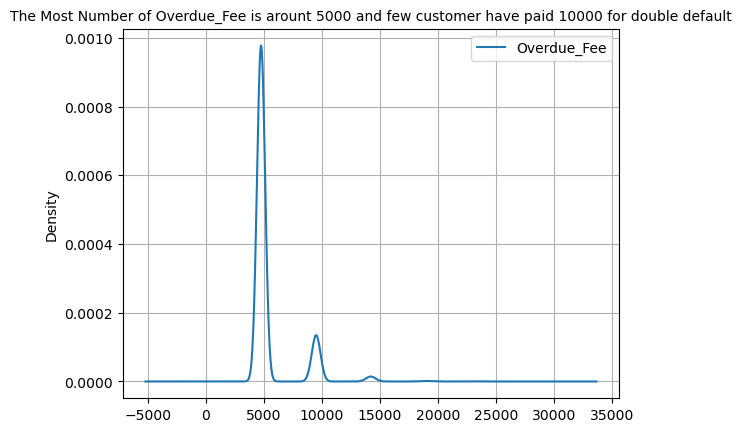

In [58]:
penality_payments = op5.query('Payment_Type == "Penalty" and Overdue_Fee >= 4500').groupby(['Customer_ID','Region'])[['Overdue_Fee']].sum().reset_index()
# penality_payments.query('Overdue_Fee >= 25000')
# penality_payments.describe().plot(kind = 'bar')
plt.figure(figsize = (2,2))
penality_payments.plot(kind = 'density',x='Region',y='Overdue_Fee')
plt.title("The Most Number of Overdue_Fee is arount 5000 and few customer have paid 10000 for double default",fontsize = 10)

plt.grid()
plt.show()


* Recovery Rates by Default_Reason and Legal_Action

C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\597906533.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recovery_by_reason = op9.groupby('Default_Reason').apply(lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum()) # Don't do index reset


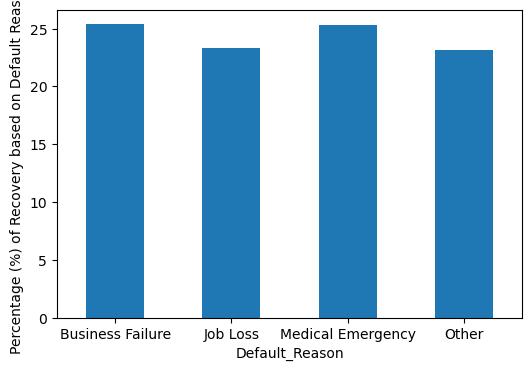

C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\597906533.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recovery_by_legal_action = op9.groupby('Legal_Action').apply(lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum())


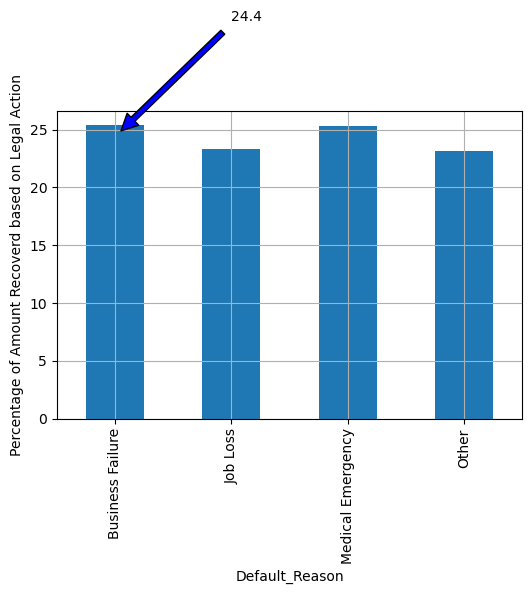

In [59]:
recovery_by_reason = op9.groupby('Default_Reason').apply(lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum()) # Don't do index reset
plt.figure(figsize = (6,4))
recovery_by_reason.plot(kind = 'bar')
plt.ylabel("Percentage (%) of Recovery based on Default Reasons")
plt.xticks(rotation = 0)
plt.show()

recovery_by_legal_action = op9.groupby('Legal_Action').apply(lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum())
plt.figure(figsize = (6,4))
recovery_by_reason.plot(kind = 'bar')
plt.annotate(round(recovery_by_legal_action.max(),2),xy = (0,recovery_by_legal_action.max()) ,xytext =(1,recovery_by_legal_action.max()+10),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.ylabel("Percentage of Amount Recoverd based on Legal Action")
plt.xticks(rotation = 90)
plt.grid()
plt.show()

* Recovery Rates Across Regions and Branches

C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\640369185.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recovery_by_region = op9.groupby('Region').apply(lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum())


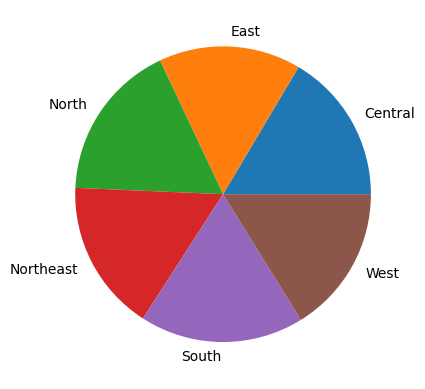

C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\640369185.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recovery_by_branch = op9.groupby('Branch_ID').apply(lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum())


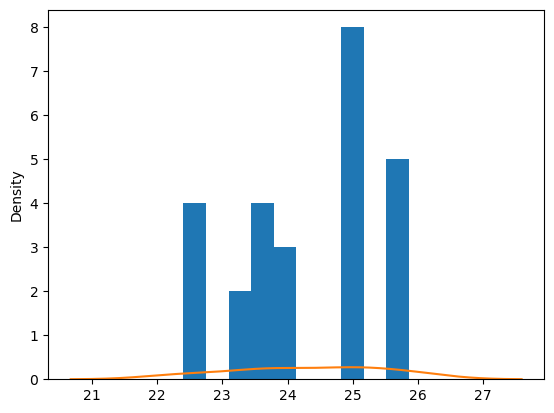

In [60]:
recovery_by_region = op9.groupby('Region').apply(lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum())
recovery_by_region.plot(kind = 'pie')
plt.show()
recovery_by_branch = op9.groupby('Branch_ID').apply(lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum())
recovery_by_branch.plot(kind = 'hist')
recovery_by_branch.plot(kind = 'kde')
# plt.axhline(op9['Recovey_Amount'].mean(),linestyle = '--')
plt.show()


# 8 EMI Analysis

* Analyze the relationship between EMI amounts and default probabilities.
* Identify thresholds for EMI amounts where defaults are most likely.
* Compare EMI trends across loan types.

In [61]:
# Analyze the relationship between EMI amounts and default probablitites

In [62]:
op9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30396 entries, 0 to 30395
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Customer_ID                 30396 non-null  object        
 1   Full_Name                   30396 non-null  object        
 2   Contact_Number              30396 non-null  int64         
 3   Email                       30396 non-null  object        
 4   Address                     30396 non-null  object        
 5   Age                         30396 non-null  int64         
 6   Gender                      30396 non-null  object        
 7   Marital_Status              30396 non-null  object        
 8   Employment_Status           30396 non-null  object        
 9   Annual_Income               30396 non-null  int64         
 10  Credit_Score                30396 non-null  int64         
 11  Region                      30396 non-null  object    

In [63]:
# Create a Default_Flag in op9
op9['Default_Flag'] = op9['_merge_x'].apply(lambda x: 1 if x == 'both' else 0)

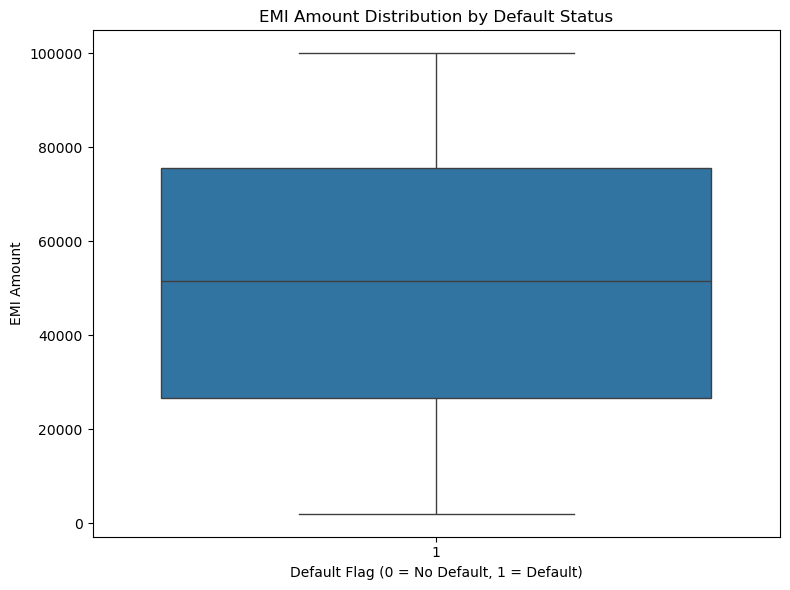

C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\1407968772.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default_prob = op9.groupby('EMI_Bin')['Default_Flag'].mean().reset_index()


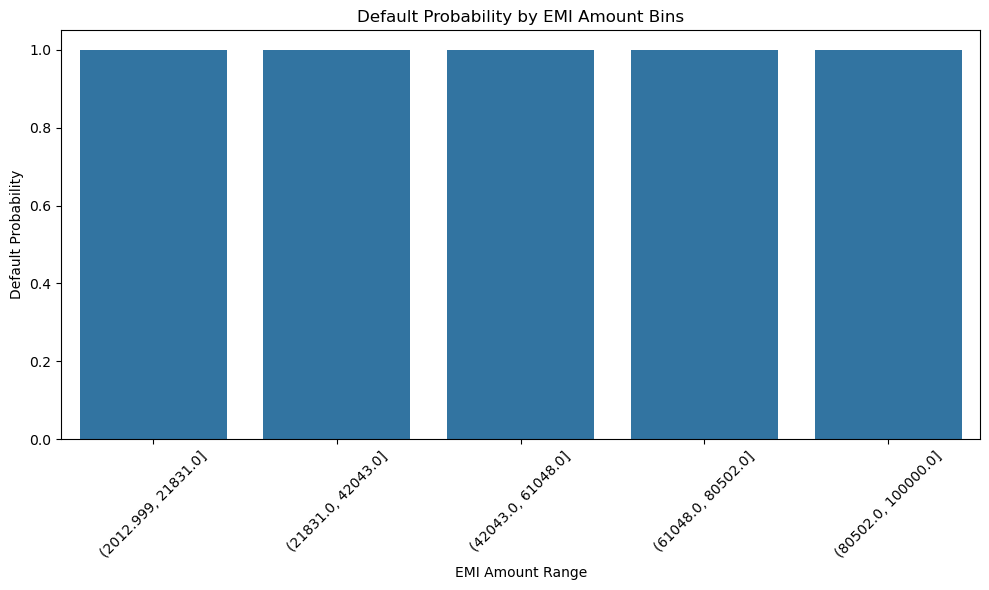

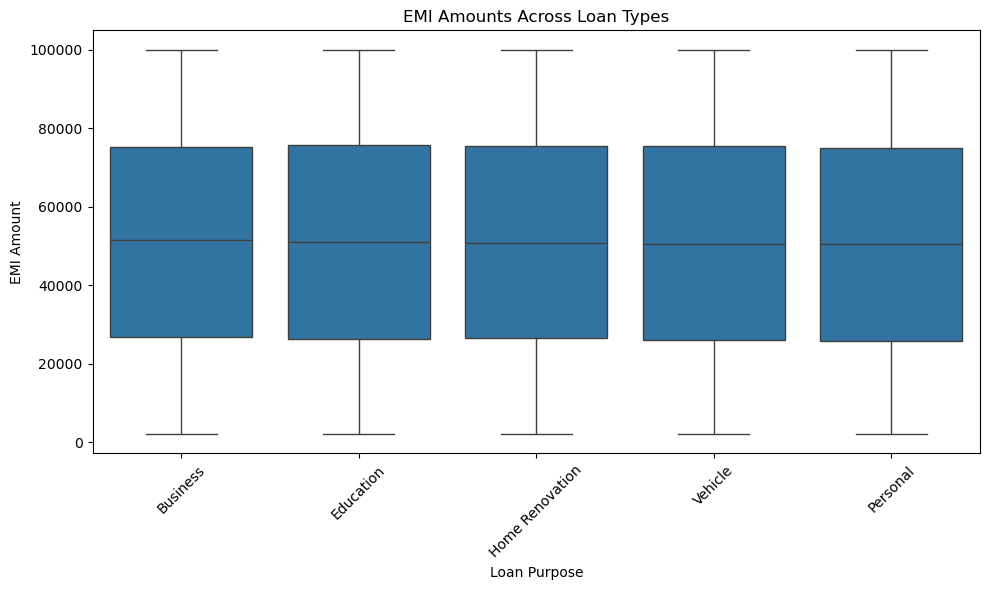

In [64]:
op9.columns.sort_values()

# 1. Analyze the relationship between EMI amounts and default probabilities
plt.figure(figsize=(8, 6))
sns.boxplot(x='Default_Flag', y='EMI_Amount', data=op9)
plt.title('EMI Amount Distribution by Default Status')
plt.xlabel('Default Flag (0 = No Default, 1 = Default)')
plt.ylabel('EMI Amount')
plt.tight_layout()
plt.show()

# 2. Identify thresholds for EMI amounts where defaults are most likely
op9['EMI_Bin'] = pd.qcut(op9['EMI_Amount'], q=5) # split of 5 groups
emi_default_prob = op9.groupby('EMI_Bin')['Default_Flag'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='EMI_Bin', y='Default_Flag', data=emi_default_prob)
plt.title('Default Probability by EMI Amount Bins')
plt.xlabel('EMI Amount Range')
plt.ylabel('Default Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Compare EMI trends across loan types
op10 = pd_loan.merge(pd_applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Purpose', y='EMI_Amount', data=op10)
plt.title('EMI Amounts Across Loan Types')
plt.xlabel('Loan Purpose')
plt.ylabel('EMI Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**RESULT:** All the default loans have equal chances that it'll be default again in future. If we see loan distribution it's spread normally without any outliers on all the loan types. Hence each default irerespective of sector or loan type going to affect all the revenue for company.

# 9 Loan Application Insights

● Calculate approval and rejection rates for loan applications.
● Identify the most common reasons for loan rejection.
● Compare application processing fees between approved and rejected
applications.

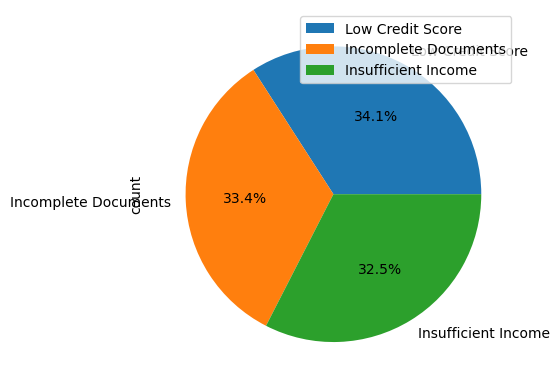

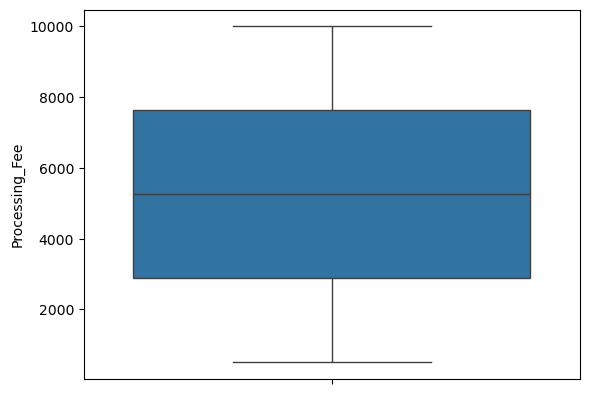

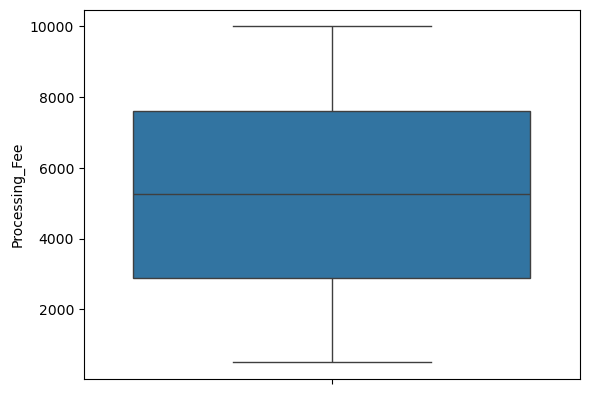

Approval Rate: 84.75%
Rejection Rate: 15.25%

Most Common Reasons for Loan Rejection:
Axes(0.22375,0.11;0.5775x0.77) 

Average Processing Fee for Approved Applications: 5252.395014285714
Average Processing Fee for Rejected Applications: 5255.141587301588


In [65]:
# Number of applications adn it's rejections count.

total_applications = len(pd_applications)
approved_count = pd_applications['Approval_Status'].str.lower().eq('approved').sum()
rejected_count = total_applications - approved_count

approval_rate = approved_count/total_applications*100
rejection_rate = rejected_count/total_applications*100

# Find out each rejected reason and use plot(kind = 'box')
rejection_reasons = pd_applications[pd_applications['Approval_Status'].str.lower() != 'approved']['Rejection_Reason']
most_common_rejection_reason = rejection_reasons.value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.legend()
plt.show()

# Compare processing fees between approved and rejected applications
approved_fees = pd_applications[pd_applications['Approval_Status'].str.lower() == 'approved']['Processing_Fee']
rejected_fees = pd_applications[pd_applications['Approval_Status'].str.lower() != 'approved']['Processing_Fee']

approved_fee_avg = approved_fees.mean()
rejected_fee_avg = rejected_fees.mean()

fee = [approved_fees,rejected_fees]
sns.boxplot(fee[0])
plt.show()
sns.boxplot(fee[1])
plt.show()

# Display the results
print(f"Approval Rate: {approval_rate:.2f}%")
print(f"Rejection Rate: {rejection_rate:.2f}%\n")

print("Most Common Reasons for Loan Rejection:")
print(most_common_rejection_reason, "\n")

print(f"Average Processing Fee for Approved Applications: {approved_fee_avg}")
print(f"Average Processing Fee for Rejected Applications: {rejected_fee_avg}")



# 10 Recovery Effectiveness

Overall Recovery Ratio: 24.31%

Recovery Rates by Legal Action:
Legal_Action
No     24.147606
Yes    24.480835
dtype: float64


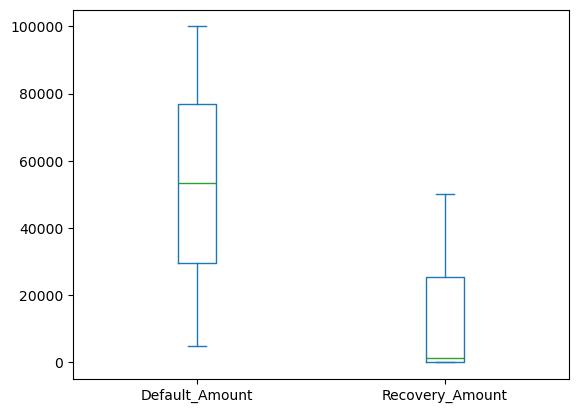

In [66]:
# 1. Overall Recovery Effectiveness
total_recovery = pd_defaults['Recovery_Amount'].sum()
total_default = pd_defaults['Default_Amount'].sum()
overall_recovery_ratio = total_recovery / total_default if total_default else 0

# 2. Recovery Rates with and without Legal Action
recovery_by_legal_action = pd_defaults.groupby('Legal_Action').apply(
    lambda x: 100*x['Recovery_Amount'].sum() / x['Default_Amount'].sum() if x['Default_Amount'].sum() else 0, include_groups=False)

op11 = pd.merge(pd_defaults, pd_loan[['Loan_ID', 'Customer_ID']], on='Loan_ID', how='left').plot(kind = 'box')


# Display results
print(f"Overall Recovery Ratio: {overall_recovery_ratio:.2%}")
print("\nRecovery Rates by Legal Action:")
print(recovery_by_legal_action)

plt.show()


# 11. Loan Disbursement Efficiency

● Analyze the time from application to loan disbursement and identify
bottlenecks.
● Compare average processing times across branches.
● Evaluate disbursement trends by loan purpose and region.

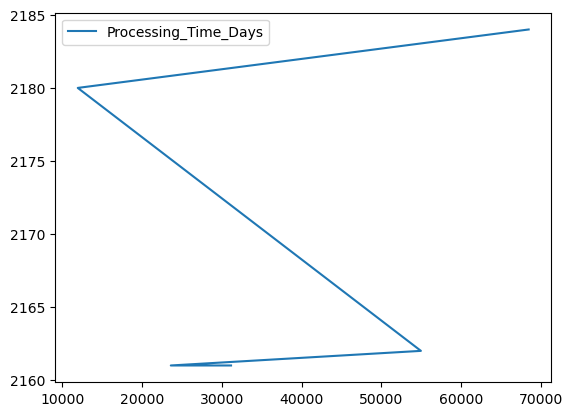

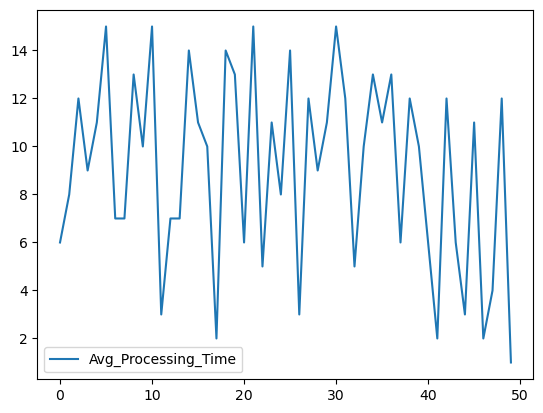

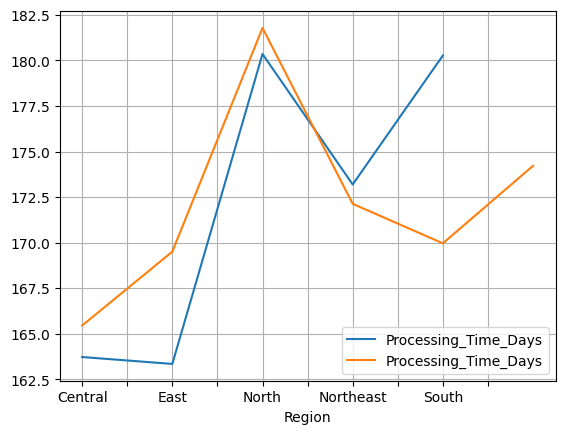

In [67]:
# Convert date columns to datetime
pd_applications["Application_Date"] = pd.to_datetime(pd_applications["Application_Date"], errors='coerce')
pd_loan["Disbursal_Date"] = pd.to_datetime(pd_loan["Disbursal_Date"], errors='coerce')

# Merge pd_application with pd_loan data to calculate processing time
merged = pd.merge(pd_applications, pd_loan[["Loan_ID", "Disbursal_Date"]], on="Loan_ID", how="left")
merged["Processing_Time_Days"] = (merged["Disbursal_Date"] - merged["Application_Date"]).dt.days

# Identify bottlenecks: pd_application with longest processing times
bottlenecks = merged.sort_values(by="Processing_Time_Days", ascending=False).head(5)
bottlenecks[["Application_ID", "Loan_ID", "Processing_Time_Days"]].plot(kind = 'line')
plt.show()

# Merge with pd_customer data to get region information
merged = pd.merge(merged, pd_customer[["Customer_ID", "Region"]], on="Customer_ID", how="left")

branch_avg_processing = pd_branch[["Branch_Name", "Avg_Processing_Time"]]
sns.lineplot(branch_avg_processing)
plt.show()
# Disbursement trends by pd_loan purpose
disbursement_by_purpose = merged.groupby("Loan_Purpose")["Processing_Time_Days"].mean()
disbursement_by_purpose.plot(kind = 'line')

# Disbursement trends by region
disbursement_by_region = merged.groupby("Region")["Processing_Time_Days"].mean()
disbursement_by_region.plot(kind = 'line')
plt.legend()
plt.grid()
plt.show()

# Output results: 



# 12 Profitable Analysis

● Calculate the total interest income generated across all loans.
● Identify the most profitable loan purposes based on interest earnings.
● Compare profitability metrics for branches across regions.

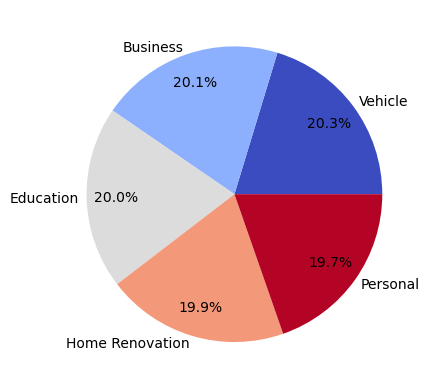

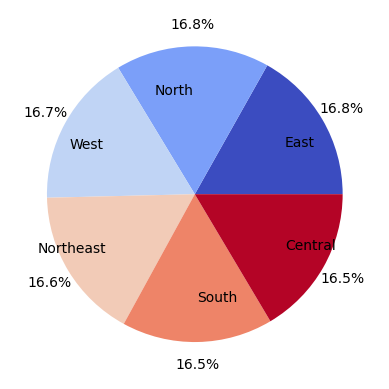

In [68]:
# Calculate total interest income for each loan
pd_loan['Interest_Income'] = (pd_loan['Loan_Amount'] * pd_loan['Interest_Rate'] * pd_loan['Loan_Term']) / (100 * 12)

# Total interest income across all loans
total_interest_income = pd_loan['Interest_Income'].sum()

# Merge loan and applications to get loan purpose
loan_app_mdf = pd.merge(pd_loan, pd_applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Most profitable loan purposes based on interest earnings
profit_by_purpose = loan_app_mdf.groupby('Loan_Purpose')['Interest_Income'].sum().sort_values(ascending=False)
profit_by_purpose.plot(kind = 'pie',autopct='%1.1f%%',colormap ='coolwarm',pctdistance=0.8, labeldistance=1.05) # Don't change distance.
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("")
plt.show()

# Merge with customer to get region
loan_customer_mdf = pd.merge(pd_loan, pd_customer[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Profitability metrics by region
profit_by_region = loan_customer_mdf.groupby('Region')['Interest_Income'].sum().sort_values(ascending=False)
profit_by_region.plot(kind = 'pie',autopct='%1.1f%%',colormap ='coolwarm', pctdistance=1.15, labeldistance=0.7) # Don't change distance.
# plt.title(f"Total Interest Income: ₹{total_interest_income:,.2f}")
plt.xlabel("")
plt.ylabel("")
plt.show()


# 13. Geospatial Analysis

● Map the distribution of active loans across regions.
● Compare default rates across different geographic regions.
● Visualize the loan disbursement trends for rural vs. urban areas.

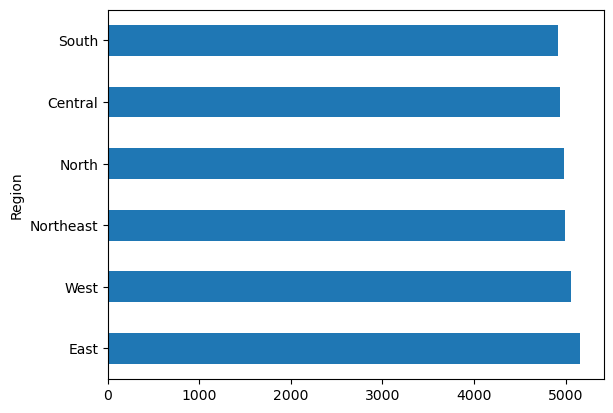

In [69]:
# we'll use op4 here

# Region_wise active loans
active_loans = op4[op4['Loan_Status'] == 'Active']
active_loan_distribution = active_loans['Region'].value_counts()

# active_loan_distribution plot

active_loan_distribution.plot(kind = 'barh')
plt.show()

In [70]:
# Default rates across Regions
default_pd_customer = pd.merge(pd_defaults, pd_customer[['Customer_ID', 'Region']], on='Customer_ID', how='left')
default_counts = default_pd_customer['Region'].value_counts()
total_customers_by_region = pd_customer['Region'].value_counts()
default_rates = (default_counts / total_customers_by_region).fillna(0) * 100

print(f"{default_rates}")

Region
Central      10.083595
East         10.135135
North         9.997434
Northeast     9.917568
South         9.966521
West         10.018823
Name: count, dtype: float64


In [71]:
# 3. Visualize loan disbursement trends for rural vs. urban areas
# Assuming 'Address' field contains hints about rural/urban classification
def classify_area(address):
    address = str(address).lower()
    if any(keyword in address for keyword in ['village', 'taluka', 'panchayat', 'rural']):
        return 'Rural'
    else:
        return 'Urban'

pd_customer['Area_Type'] = pd_customer['Address'].apply(classify_area)
loan_area_df = pd.merge(pd_loan, pd_customer[['Customer_ID', 'Area_Type']], on='Customer_ID', how='left')
loan_area_df['Disbursal_Year'] = pd.to_datetime(loan_area_df['Disbursal_Date'], errors='coerce').dt.year
disbursement_trends = loan_area_df.groupby(['Disbursal_Year', 'Area_Type']).size().unstack(fill_value=0)

C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\2684846321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_loan_distribution.index, y=active_loan_distribution.values, hue_order = 'Region',palette='Blues_d')
C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\2684846321.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette='Reds_d')


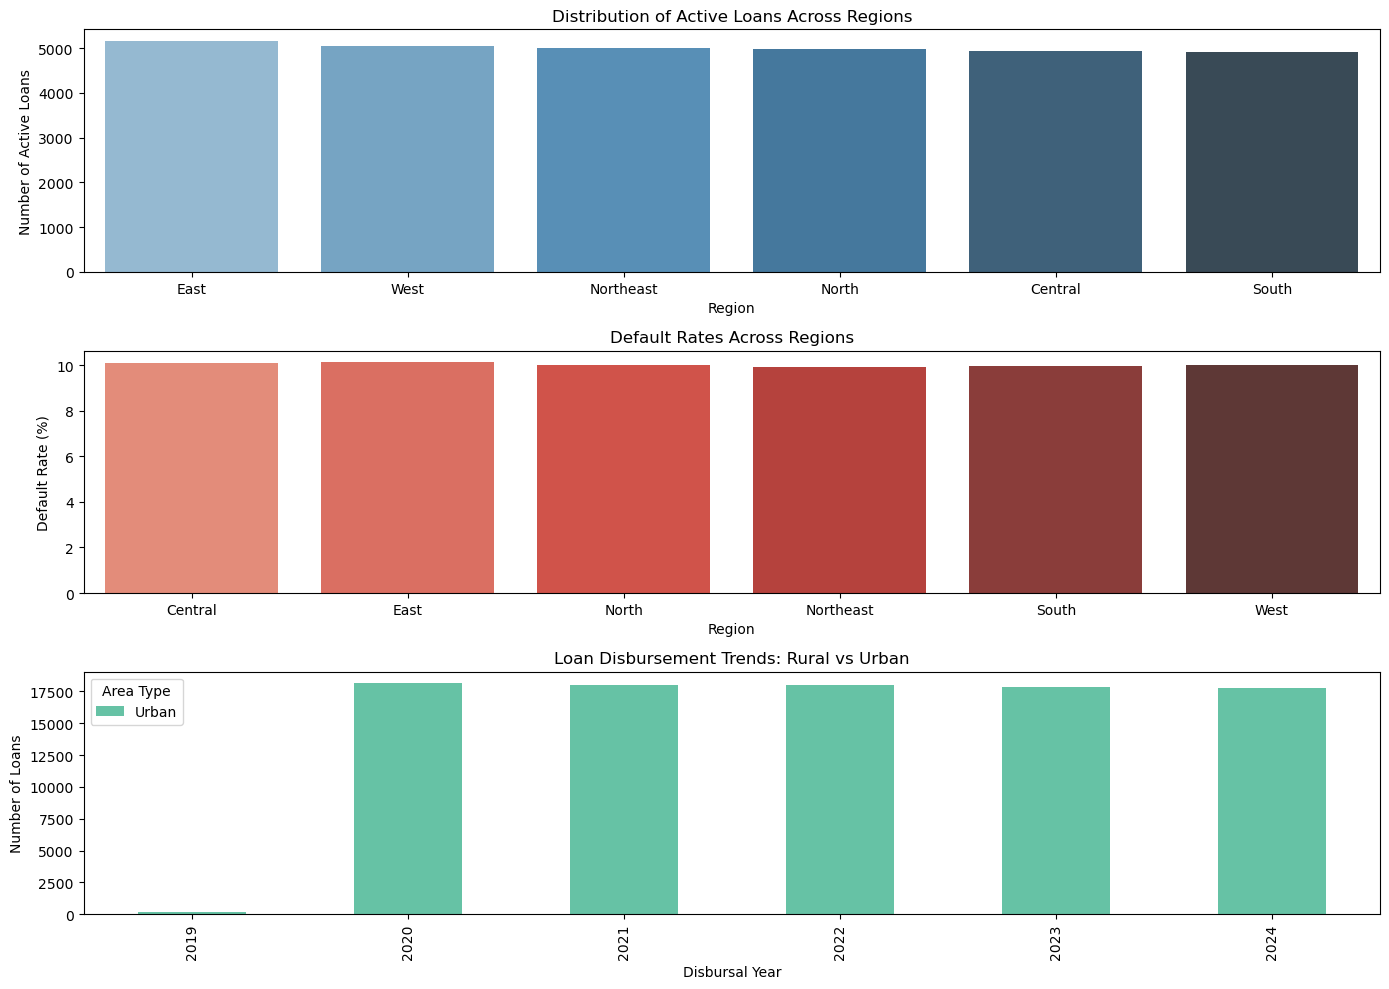

In [72]:
# Plotting
plt.figure(figsize=(14, 10))

# Plot 1: Active Loan Distribution
plt.subplot(3, 1, 1)
sns.barplot(x=active_loan_distribution.index, y=active_loan_distribution.values, hue_order = 'Region',palette='Blues_d')
plt.title('Distribution of Active Loans Across Regions')
plt.ylabel('Number of Active Loans')
plt.xlabel('Region')

# Plot 2: Default Rates by Region
plt.subplot(3, 1, 2)
sns.barplot(x=default_rates.index, y=default_rates.values, palette='Reds_d')
plt.title('Default Rates Across Regions')
plt.ylabel('Default Rate (%)')
plt.xlabel('Region')

# Plot 3: Loan Disbursement Trends for Rural vs Urban
plt.subplot(3, 1, 3)
disbursement_trends.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
plt.title('Loan Disbursement Trends: Rural vs Urban')
plt.ylabel('Number of Loans')
plt.xlabel('Disbursal Year')
plt.legend(title='Area Type')

plt.tight_layout()
plt.show()

# 14. Default Trends

● Analyze the number of defaults over time to identify patterns.
● Calculate the average default amount for different loan purposes.
● Compare default rates across customer income categories.

In [73]:
pd_defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Default_ID       9000 non-null   object
 1   Loan_ID          9000 non-null   object
 2   Customer_ID      9000 non-null   object
 3   Default_Date     9000 non-null   object
 4   Default_Amount   9000 non-null   int64 
 5   Default_Reason   9000 non-null   object
 6   Recovery_Status  9000 non-null   object
 7   Recovery_Amount  9000 non-null   int64 
 8   Legal_Action     9000 non-null   object
dtypes: int64(2), object(7)
memory usage: 632.9+ KB


In [74]:
pd_defaults['Default_Date'] = pd.to_datetime(pd_defaults['Default_Date'])

In [75]:
pd_defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Default_ID       9000 non-null   object        
 1   Loan_ID          9000 non-null   object        
 2   Customer_ID      9000 non-null   object        
 3   Default_Date     9000 non-null   datetime64[ns]
 4   Default_Amount   9000 non-null   int64         
 5   Default_Reason   9000 non-null   object        
 6   Recovery_Status  9000 non-null   object        
 7   Recovery_Amount  9000 non-null   int64         
 8   Legal_Action     9000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 632.9+ KB


In [76]:
ldf12 = pd_defaults
rdf12 = pd_applications
cols = ['Loan_ID']
op12 = pd.merge(ldf12,rdf12,on=cols,how='left',indicator=True)
op12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Default_ID        9000 non-null   object        
 1   Loan_ID           9000 non-null   object        
 2   Customer_ID_x     9000 non-null   object        
 3   Default_Date      9000 non-null   datetime64[ns]
 4   Default_Amount    9000 non-null   int64         
 5   Default_Reason    9000 non-null   object        
 6   Recovery_Status   9000 non-null   object        
 7   Recovery_Amount   9000 non-null   int64         
 8   Legal_Action      9000 non-null   object        
 9   Application_ID    7014 non-null   object        
 10  Customer_ID_y     7014 non-null   object        
 11  Application_Date  7014 non-null   datetime64[ns]
 12  Approval_Date     7014 non-null   object        
 13  Loan_Purpose      7014 non-null   object        
 14  Source_Channel    7014 n

In [77]:
op12['Month'] = op12['Default_Date'].dt.strftime('%B')
op12.head()

Default_ID  Loan_ID Customer_ID_x Default_Date  Default_Amount  \
0    D000001  L007312       C007312   2022-07-20           94480   
1    D000002  L028234       C028234   2023-09-23           10912   
2    D000003  L008319       C008319   2024-08-04           73711   
3    D000004  L046668       C046668   2021-10-16           48955   
4    D000005  L082934       C082934   2024-10-07           56952   

      Default_Reason Recovery_Status  Recovery_Amount Legal_Action  \
0           Job Loss         Partial            30360          Yes   
1           Job Loss        Not Paid                0          Yes   
2              Other         Partial             9866          Yes   
3              Other        Not Paid                0          Yes   
4  Medical Emergency        Not Paid                0           No   

  Application_ID Customer_ID_y Application_Date Approval_Date  \
0        A007312       C007312       2019-03-25    2021-09-27   
1        A028234       C028234       2024-04-14    2021-04-19   
2        A008319       C008319       2021-12-10    2022-02-16   
3        A046668       C046668       2023-12-13    2022-05-28   
4            NaN           NaN              NaT           NaN   

      Loan_Purpose Source_Channel  Processing_Fee Approval_Status  \
0         Business         Online          8120.0        Approved   
1  Home Renovation          Agent          4691.0        Approved   
2         Business         Online          7011.0        Approved   
3          Vehicle         Online          7153.0        Approved   
4              NaN            NaN             NaN             NaN   

  Rejection_Reason     _merge      Month  
0              NaN       both       July  
1              NaN       both  September  
2              NaN       both     August  
3              NaN       both    October  
4              NaN  left_only    October

In [78]:
op12['Year'] = op12['Default_Date'].dt.year
op12.head()

Default_ID  Loan_ID Customer_ID_x Default_Date  Default_Amount  \
0    D000001  L007312       C007312   2022-07-20           94480   
1    D000002  L028234       C028234   2023-09-23           10912   
2    D000003  L008319       C008319   2024-08-04           73711   
3    D000004  L046668       C046668   2021-10-16           48955   
4    D000005  L082934       C082934   2024-10-07           56952   

      Default_Reason Recovery_Status  Recovery_Amount Legal_Action  \
0           Job Loss         Partial            30360          Yes   
1           Job Loss        Not Paid                0          Yes   
2              Other         Partial             9866          Yes   
3              Other        Not Paid                0          Yes   
4  Medical Emergency        Not Paid                0           No   

  Application_ID  ... Application_Date Approval_Date     Loan_Purpose  \
0        A007312  ...       2019-03-25    2021-09-27         Business   
1        A028234  ...       2024-04-14    2021-04-19  Home Renovation   
2        A008319  ...       2021-12-10    2022-02-16         Business   
3        A046668  ...       2023-12-13    2022-05-28          Vehicle   
4            NaN  ...              NaT           NaN              NaN   

  Source_Channel Processing_Fee  Approval_Status Rejection_Reason     _merge  \
0         Online         8120.0         Approved              NaN       both   
1          Agent         4691.0         Approved              NaN       both   
2         Online         7011.0         Approved              NaN       both   
3         Online         7153.0         Approved              NaN       both   
4            NaN            NaN              NaN              NaN  left_only   

       Month  Year  
0       July  2022  
1  September  2023  
2     August  2024  
3    October  2021  
4    October  2024  

[5 rows x 21 columns]

In [79]:
defaults_per_month = op12.groupby(['Month','Year']).size().sort_index()
defaults_per_month

Month      Year
April      2021    196
           2022    199
           2023    207
           2024    194
August     2021    192
           2022    179
           2023    176
           2024    187
December   2021    191
           2022    216
           2023    176
           2024    191
February   2021    171
           2022    163
           2023    169
           2024    168
January    2021    164
           2022    190
           2023    181
           2024    195
           2025      7
July       2021    177
           2022    172
           2023    198
           2024    187
June       2021    181
           2022    186
           2023    173
           2024    194
March      2021    189
           2022    183
           2023    187
           2024    205
May        2021    195
           2022    192
           2023    170
           2024    216
November   2021    189
           2022    210
           2023    175
           2024    202
October    2021    171
           2022   

In [80]:
avg_default_by_purpose = op12.groupby('Loan_Purpose')['Default_Amount'].mean()

In [81]:
op2['Income_Category'] = pd.cut(pd_customer['Annual_Income'],bins=[0, 500000, 1000000, float('inf')],labels=['Low', 'Medium', 'High'])

In [82]:
total_customers_by_income = op2['Income_Category'].value_counts()
defaults_by_income = op2['Income_Category'].value_counts()
default_rate_by_income = (defaults_by_income / total_customers_by_income).fillna(0)

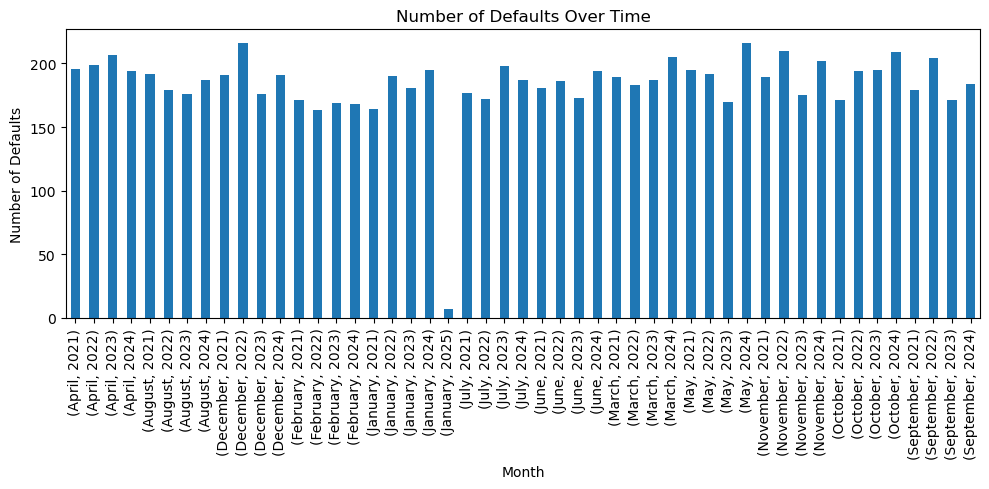

Average Default Amount by Loan Purpose:
Loan_Purpose
Business           53261.031433
Education          53797.758769
Home Renovation    53038.080028
Personal           52389.399011
Vehicle            52671.599578
Name: Default_Amount, dtype: float64

Default Rates by Income Category:
Income_Category
High      1.0
Medium    1.0
Low       1.0
Name: count, dtype: float64


In [83]:
# Plotting defaults over time
plt.figure(figsize=(10, 5))
defaults_per_month.sort_index().plot(kind='bar')
plt.title('Number of Defaults Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Defaults')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display results
print("Average Default Amount by Loan Purpose:")
print(avg_default_by_purpose)
print("\nDefault Rates by Income Category:")
print(default_rate_by_income)

**RESULT:** Each Income_Category have equal Default Rates

# 15. Branch Efficiency

● Calculate the average loan disbursement time for each branch.
● Identify branches with the highest number of rejected applications.
● Compare branch efficiency based on customer satisfaction metrics (if
available).


In [84]:
## Conversion of date time done earlier but it's not reflected here.
pd_applications.info()
pd_applications.Approval_Date = pd.to_datetime(pd_applications.Approval_Date) # doing it again.
pd_applications.info()
op13 = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Application_ID    82600 non-null  object        
 1   Loan_ID           70000 non-null  object        
 2   Customer_ID       82600 non-null  object        
 3   Application_Date  82600 non-null  datetime64[ns]
 4   Approval_Date     70000 non-null  object        
 5   Loan_Purpose      82600 non-null  object        
 6   Source_Channel    82600 non-null  object        
 7   Processing_Fee    82600 non-null  int64         
 8   Approval_Status   82600 non-null  object        
 9   Rejection_Reason  12600 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------

In [85]:
ldf13 = pd_applications
rdf13 = pd_customer[['Customer_ID','Region']]
cols = ['Customer_ID']
op13 = pd.merge(ldf13,rdf13,on=cols,how='left',indicator=True)
op13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Application_ID    82600 non-null  object        
 1   Loan_ID           70000 non-null  object        
 2   Customer_ID       82600 non-null  object        
 3   Application_Date  82600 non-null  datetime64[ns]
 4   Approval_Date     70000 non-null  datetime64[ns]
 5   Loan_Purpose      82600 non-null  object        
 6   Source_Channel    82600 non-null  object        
 7   Processing_Fee    82600 non-null  int64         
 8   Approval_Status   82600 non-null  object        
 9   Rejection_Reason  12600 non-null  object        
 10  Region            82600 non-null  object        
 11  _merge            82600 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(1), object(8)
memory usage: 7.0+ MB


In [86]:
# Now Merge op13 with Branch to get all the details with inner joint on Branch.
op13 = op13.merge(pd_branch,on='Region',how='inner')
op13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688010 entries, 0 to 688009
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Application_ID              688010 non-null  object        
 1   Loan_ID                     583166 non-null  object        
 2   Customer_ID                 688010 non-null  object        
 3   Application_Date            688010 non-null  datetime64[ns]
 4   Approval_Date               583166 non-null  datetime64[ns]
 5   Loan_Purpose                688010 non-null  object        
 6   Source_Channel              688010 non-null  object        
 7   Processing_Fee              688010 non-null  int64         
 8   Approval_Status             688010 non-null  object        
 9   Rejection_Reason            104844 non-null  object        
 10  Region                      688010 non-null  object        
 11  _merge                      688010 non-

* Calculate the average loan disbursement time for each branch

In [87]:
avg_disbursement_by_region = op13.query('Approval_Status=="Approved"').groupby('Region')['Avg_Processing_Time'].mean().reset_index()

In [88]:
avg_disbursement_by_region

Region  Avg_Processing_Time
0    Central             9.500000
1       East             9.875000
2      North            10.357143
3  Northeast             6.500000
4      South             9.000000
5       West             6.166667

● Identify branches with the highest number of rejected applications.

In [89]:
highest_rej_branch = op13.query('Approval_Status =="Rejected"').groupby(['Branch_Name','Region'])['Branch_ID'].count().reset_index()

<Axes: ylabel='Frequency'>

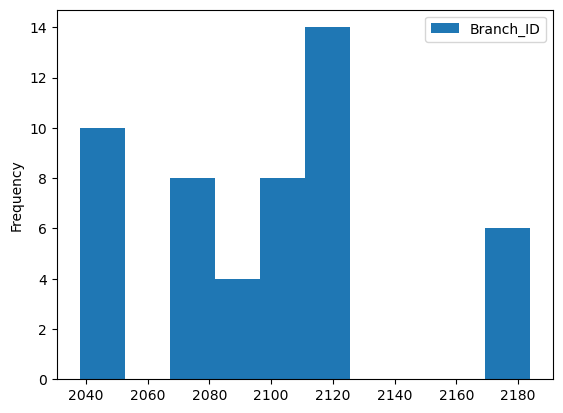

In [90]:
highest_rej_branch.plot(kind = 'hist')

* Compare branch efficiency based on customer satisfaction metrics (if available)

**RESULT:** Highest Rejection frequency is for branch 2120. and 2) North region is having highest processign time: 10.357143
No Metrics available to determine customer feedback

# 16. Time-Series Analysis

● Analyze monthly loan disbursement trends over the last 5 years.
● Identify seasonal patterns in loan applications and disbursements.
● Compare monthly default rates across regions.

In [91]:
op13.info()
op12.Approval_Date = pd.to_datetime(op12.Approval_Date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688010 entries, 0 to 688009
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Application_ID              688010 non-null  object        
 1   Loan_ID                     583166 non-null  object        
 2   Customer_ID                 688010 non-null  object        
 3   Application_Date            688010 non-null  datetime64[ns]
 4   Approval_Date               583166 non-null  datetime64[ns]
 5   Loan_Purpose                688010 non-null  object        
 6   Source_Channel              688010 non-null  object        
 7   Processing_Fee              688010 non-null  int64         
 8   Approval_Status             688010 non-null  object        
 9   Rejection_Reason            104844 non-null  object        
 10  Region                      688010 non-null  object        
 11  _merge                      688010 non-

In [92]:
op12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Default_ID        9000 non-null   object        
 1   Loan_ID           9000 non-null   object        
 2   Customer_ID_x     9000 non-null   object        
 3   Default_Date      9000 non-null   datetime64[ns]
 4   Default_Amount    9000 non-null   int64         
 5   Default_Reason    9000 non-null   object        
 6   Recovery_Status   9000 non-null   object        
 7   Recovery_Amount   9000 non-null   int64         
 8   Legal_Action      9000 non-null   object        
 9   Application_ID    7014 non-null   object        
 10  Customer_ID_y     7014 non-null   object        
 11  Application_Date  7014 non-null   datetime64[ns]
 12  Approval_Date     7014 non-null   datetime64[ns]
 13  Loan_Purpose      7014 non-null   object        
 14  Source_Channel    7014 n

In [93]:
recent_apps = pd_applications[pd_applications['Approval_Date'].dt.year >= pd.Timestamp.now().year - 5]

In [94]:
recent_apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Application_ID    70000 non-null  object        
 1   Loan_ID           70000 non-null  object        
 2   Customer_ID       70000 non-null  object        
 3   Application_Date  70000 non-null  datetime64[ns]
 4   Approval_Date     70000 non-null  datetime64[ns]
 5   Loan_Purpose      70000 non-null  object        
 6   Source_Channel    70000 non-null  object        
 7   Processing_Fee    70000 non-null  int64         
 8   Approval_Status   70000 non-null  object        
 9   Rejection_Reason  0 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 5.9+ MB


In [95]:
monthly_disbursement = recent_apps.groupby(recent_apps['Approval_Date'].dt.to_period('M')).size().reset_index(name='Disbursements')
monthly_disbursement['Approval_Date'] = monthly_disbursement['Approval_Date'].dt.to_timestamp()

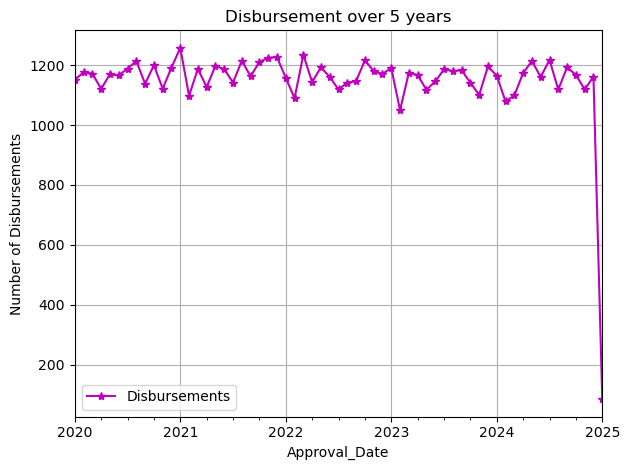

In [96]:
monthly_disbursement.plot(kind = 'line',x='Approval_Date',y='Disbursements',style = ['m'],marker ='*')
plt.title("Disbursement over 5 years")
plt.ylabel("Number of Disbursements")
plt.tight_layout()
plt.grid()

In [97]:
monthly_applications = pd_applications.groupby(pd_applications['Application_Date'].dt.month).size().reset_index(name='Applications')
monthly_disbursements = pd_applications.groupby(pd_applications['Approval_Date'].dt.month).size().reset_index(name='Disbursements')

In [98]:
op13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688010 entries, 0 to 688009
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Application_ID              688010 non-null  object        
 1   Loan_ID                     583166 non-null  object        
 2   Customer_ID                 688010 non-null  object        
 3   Application_Date            688010 non-null  datetime64[ns]
 4   Approval_Date               583166 non-null  datetime64[ns]
 5   Loan_Purpose                688010 non-null  object        
 6   Source_Channel              688010 non-null  object        
 7   Processing_Fee              688010 non-null  int64         
 8   Approval_Status             688010 non-null  object        
 9   Rejection_Reason            104844 non-null  object        
 10  Region                      688010 non-null  object        
 11  _merge                      688010 non-

In [99]:
op13['Month'] = op13['Approval_Date'].dt.strftime('%B')
op13['Year'] = op13['Approval_Date'].dt.year

<Axes: >

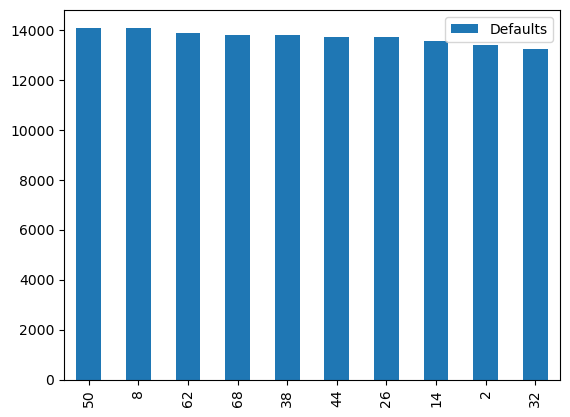

In [130]:
monthly_defaults_region = op13.groupby(['Month', 'Region']).size().reset_index(name='Defaults')
monthly_defaults_region.sort_values(by = 'Defaults', ascending = False).head(10).plot(kind = 'bar')

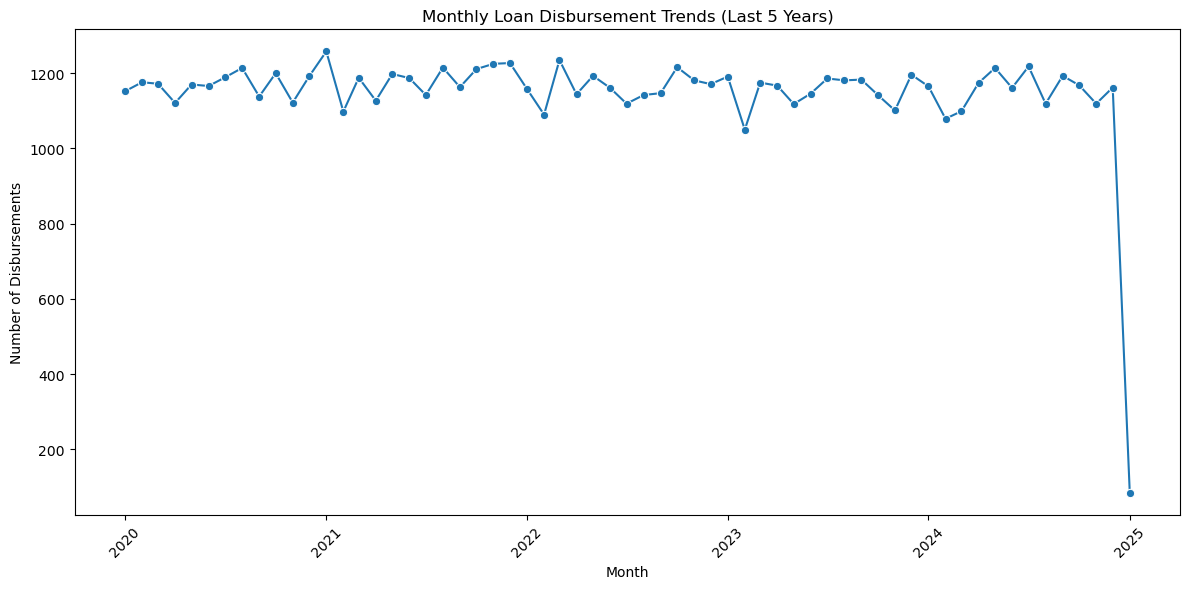

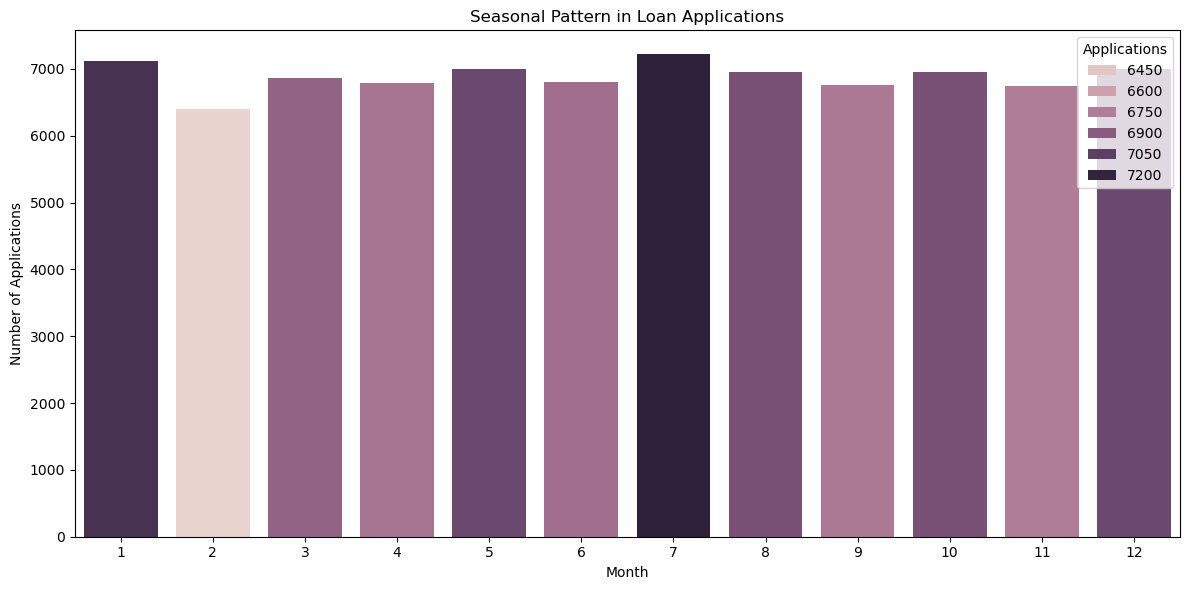

In [101]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_disbursement, x='Approval_Date', y='Disbursements', marker='o')
plt.title('Monthly Loan Disbursement Trends (Last 5 Years)')
plt.xlabel('Month')
plt.ylabel('Number of Disbursements')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_applications, x='Application_Date', y='Applications', hue ='Applications')
plt.title('Seasonal Pattern in Loan Applications')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.tight_layout()
plt.show()

# 17 Customer Behavior Analysis

● Analyze patterns in loan approval and rejection reasons segmented by customer demographics.
● Identify high-value customers with consistent repayment histories.
 Categorize customers based on their repayment behavior (e.g., always on
time, occasional defaulters, frequent defaulters).

In [102]:
op0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Application_ID           82600 non-null  object  
 1   Loan_ID                  70000 non-null  object  
 2   Customer_ID              82600 non-null  object  
 3   Application_Date         82600 non-null  object  
 4   Approval_Date            70000 non-null  object  
 5   Loan_Purpose             82600 non-null  object  
 6   Source_Channel           82600 non-null  object  
 7   Processing_Fee           82600 non-null  int64   
 8   Approval_Status          82600 non-null  object  
 9   Rejection_Reason         12600 non-null  object  
 10  Full_Name                82600 non-null  object  
 11  Contact_Number           82600 non-null  int64   
 12  Email                    82600 non-null  object  
 13  Address                  82600 non-null  object  
 14  Age   

In [103]:
# Count approvals and rejections by gender
# approval_by_gender = op0.groupby(['Gender', 'Approval_Status']).size().unstack(fill_value=0)

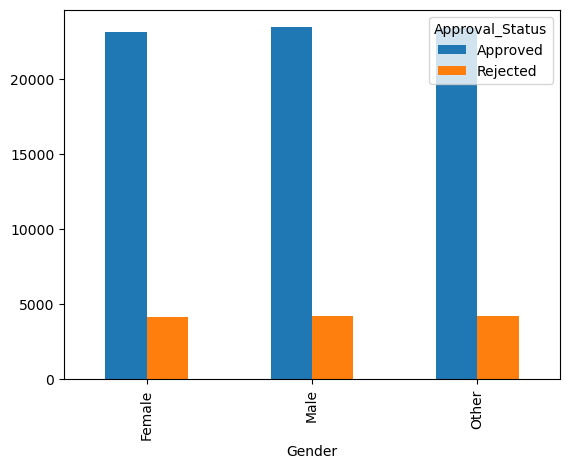

In [143]:
approval_by_gender = op0.pivot_table(index = 'Gender',columns='Approval_Status',aggfunc = 'size',fill_value=0).plot(kind = 'bar')

In [140]:
approval_by_gender

Approval_Status  Approved  Rejected
Gender                             
Female              23171      4180
Male                23448      4201
Other               23381      4219

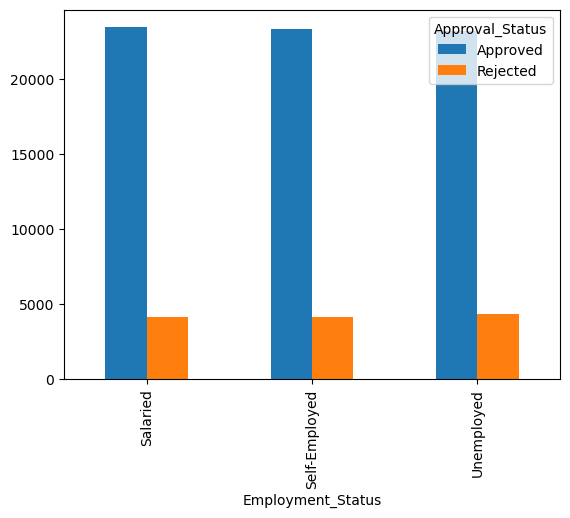

In [145]:
# Count approvals and rejections by employment status
approval_by_employment = op0.pivot_table(index = 'Employment_Status',columns='Approval_Status',aggfunc = 'size',fill_value=0).plot(kind = 'bar')

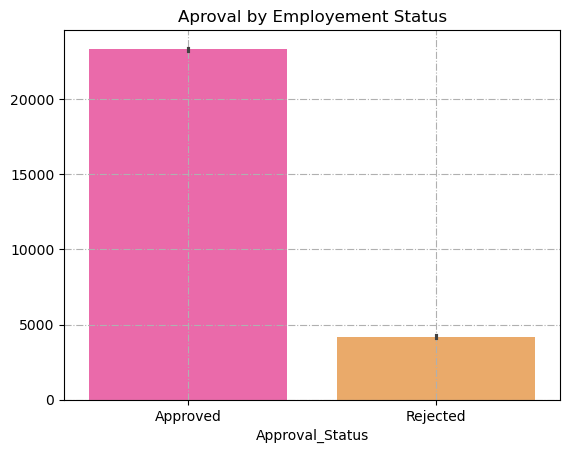

In [106]:
sns.barplot(approval_by_employment,palette ='spring')
plt.title("Aproval by Employement Status")
plt.grid(linestyle = '-.')

C:\Users\SMangal\AppData\Local\Temp\ipykernel_18776\1620882566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(rejection_reasons,palette = 'winter')


<Axes: xlabel='Rejection_Reason', ylabel='count'>

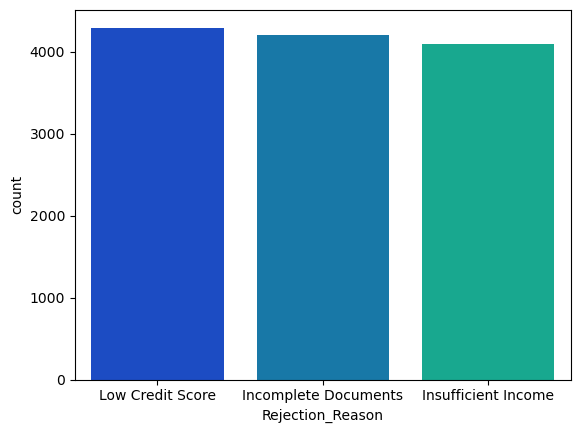

In [107]:
# Count rejection reasons
rejection_reasons = op0['Rejection_Reason'].value_counts()
sns.barplot(rejection_reasons,palette = 'winter')

In [108]:
# Filter loans with status 'Closed' and no overdue
high_value_loans = op4[(op4['Loan_Status'] == 'Closed') & (op4['Overdue_Amount'] == 0)]
high_value_loans

Loan_ID Customer_ID  Loan_Amount  Interest_Rate  Loan_Term  \
5      L000006     C038381      3107401          10.69         24   
19     L000020     C059813      1239057           8.60         36   
20     L000021     C067427      4814253           8.87         60   
30     L000031     C028689      3231038           8.82         60   
38     L000039     C011104      4291400          12.28         12   
...        ...         ...          ...            ...        ...   
89969  L089970     C034868      1098393          14.07         48   
89974  L089975     C063425       825451          12.55         36   
89977  L089978     C050642      1033148          11.58         12   
89979  L089980     C017037      2043629          11.91         36   
89995  L089996     C062366      4932615          12.68         36   

      Disbursal_Date Repayment_Start_Date Repayment_End_Date Loan_Status  \
5         2022-06-17           2022-07-17         2024-06-17      Closed   
19        2022-01-12           2022-02-12         2025-01-12      Closed   
20        2024-06-07           2024-07-07         2029-06-07      Closed   
30        2024-08-06           2024-09-06         2029-08-06      Closed   
38        2022-02-13           2022-03-13         2023-02-13      Closed   
...              ...                  ...                ...         ...   
89969     2023-12-11           2024-01-11         2027-12-11      Closed   
89974     2022-11-16           2022-12-16         2025-11-16      Closed   
89977     2023-06-01           2023-07-01         2024-06-01      Closed   
89979     2023-04-07           2023-05-07         2026-04-07      Closed   
89995     2023-03-04           2023-04-04         2026-03-04      Closed   

       Overdue_Amount  ...  Age  Gender Marital_Status  Employment_Status  \
5                   0  ...   19   Other       Divorced           Salaried   
19                  0  ...   24    Male         Single         Unemployed   
20                  0  ...   22    Male        Married         Unemployed   
30                  0  ...   64  Female         Single         Unemployed   
38                  0  ...   29  Female        Married           Salaried   
...               ...  ...  ...     ...            ...                ...   
89969               0  ...   62    Male         Single      Self-Employed   
89974               0  ...   64    Male         Single      Self-Employed   
89977               0  ...   24  Female       Divorced         Unemployed   
89979               0  ...   41  Female         Single      Self-Employed   
89995               0  ...   47   Other        Married           Salaried   

      Annual_Income Credit_Score     Region Account_Tenure  \
5            476095          633      North       15 Years   
19          1934814          657      North        5 Years   
20          1015208          656       West        9 Years   
30          1666288          603      North        3 Years   
38          1618678          457  Northeast        1 Years   
...             ...          ...        ...            ...   
89969       1192797          372      North        6 Years   
89974        444480          370       West        8 Years   
89977        916489          557  Northeast       14 Years   
89979        859110          775      North        4 Years   
89995        791646          417       East        9 Years   

      Relationship_Manager_ID _merge  
5                      RM0236   both  
19                     RM0085   both  
20                     RM0168   both  
30                     RM0078   both  
38                     RM0112   both  
...                       ...    ...  
89969                  RM0214   both  
89974                  RM0402   both  
89977                  RM0454   both  
89979                  RM0182   both  
89995                  RM0034   both  

[14999 rows x 26 columns]

In [109]:
top_high_value_customers = op4.sort_values(by='Loan_Amount', ascending=False)
top_high_value_customers

Loan_ID Customer_ID  Loan_Amount  Interest_Rate  Loan_Term  \
20087  L020088     C025049      4999958           7.13         24   
84304  L084305     C043478      4999943          12.28         12   
16985  L016986     C047791      4999901          12.51         48   
42525  L042526     C037688      4999884          11.92         36   
20259  L020260     C026223      4999849           9.12         48   
...        ...         ...          ...            ...        ...   
21183  L021184     C028380        50226          10.39         12   
35795  L035796     C068914        50106          11.12         12   
18960  L018961     C012180        50042          13.19         48   
29417  L029418     C040646        50028           8.75         48   
62596  L062597     C012922        50026           9.52         48   

      Disbursal_Date Repayment_Start_Date Repayment_End_Date Loan_Status  \
20087     2024-01-25           2024-02-25         2026-01-25      Active   
84304     2021-11-22           2021-12-22         2022-11-22      Closed   
16985     2022-06-03           2022-07-03         2026-06-03      Closed   
42525     2022-02-13           2022-03-13         2025-02-13      Closed   
20259     2022-08-20           2022-09-20         2026-08-20      Closed   
...              ...                  ...                ...         ...   
21183     2024-06-02           2024-07-02         2025-06-02      Active   
35795     2022-07-28           2022-08-28         2023-07-28     Overdue   
18960     2023-09-08           2023-10-08         2027-09-08     Overdue   
29417     2024-07-01           2024-08-01         2028-07-01      Active   
62596     2023-10-26           2023-11-26         2027-10-26      Closed   

       Overdue_Amount  ...  Age  Gender Marital_Status  Employment_Status  \
20087               0  ...   40  Female         Single         Unemployed   
84304           32527  ...   39  Female         Single      Self-Employed   
16985           14912  ...   27   Other       Divorced           Salaried   
42525           49791  ...   20   Other       Divorced         Unemployed   
20259           10925  ...   62  Female       Divorced           Salaried   
...               ...  ...  ...     ...            ...                ...   
21183           19121  ...   68    Male         Single      Self-Employed   
35795               0  ...   20   Other       Divorced           Salaried   
18960            8205  ...   48    Male       Divorced         Unemployed   
29417               0  ...   61   Other        Married           Salaried   
62596               0  ...   57   Other       Divorced           Salaried   

      Annual_Income Credit_Score     Region Account_Tenure  \
20087       1324988          339  Northeast       15 Years   
84304       1881196          579       East        7 Years   
16985        443258          790    Central        5 Years   
42525       1412046          745    Central        2 Years   
20259       1717823          722    Central        3 Years   
...             ...          ...        ...            ...   
21183        230364          505  Northeast        1 Years   
35795        851577          588    Central       12 Years   
18960       1346997          412  Northeast        9 Years   
29417       1645323          846  Northeast        5 Years   
62596        800057          527  Northeast       12 Years   

      Relationship_Manager_ID _merge  
20087                  RM0036   both  
84304                  RM0136   both  
16985                  RM0211   both  
42525                  RM0025   both  
20259                  RM0111   both  
...                       ...    ...  
21183                  RM0169   both  
35795                  RM0484   both  
18960                  RM0460   both  
29417                  RM0104   both  
62596                  RM0395   both  

[90000 rows x 26 columns]

In [110]:
op3.columns.sort_values()

Index(['Collateral_Details', 'Customer_ID_x', 'Customer_ID_y',
       'Default_Amount', 'Default_Date', 'Default_ID', 'Default_Reason',
       'Disbursal_Date', 'EMI_Amount', 'Interest_Rate', 'Legal_Action',
       'Loan_Amount', 'Loan_ID', 'Loan_Status', 'Loan_Term', 'Overdue_Amount',
       'Recovery_Amount', 'Recovery_Status', 'Repayment_End_Date',
       'Repayment_Start_Date', '_merge'],
      dtype='object')

In [111]:
# Count number of defaults per customer
default_counts = pd_defaults[['Customer_ID','Loan_ID']].value_counts().reset_index()
default_counts.columns = ['Customer_ID', 'Loan_ID','Default_Count']

Text(0, 0.5, 'Number of Customer Defaulted')

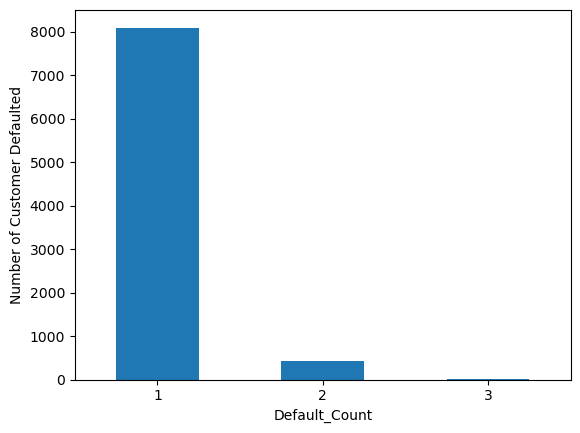

In [112]:
default_counts.groupby('Default_Count')['Customer_ID'].count().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.ylabel("Number of Customer Defaulted")

<Axes: ylabel='Default_Count'>

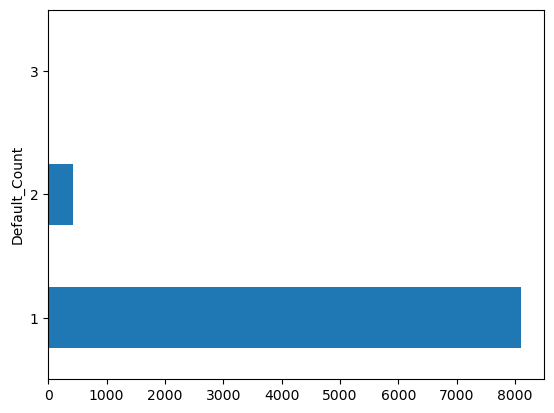

In [113]:
repayment_behavior = pd.merge(pd_customer[['Customer_ID', 'Full_Name']], default_counts, on='Customer_ID', how='right')
repayment_behavior.sort_values(by='Default_Count',ascending = False)
repayment_behavior.groupby('Default_Count')['Customer_ID'].count().plot(kind = 'barh')

In [114]:
repayment_behavior.isna().sum()

Customer_ID         0
Full_Name        1885
Loan_ID             0
Default_Count       0
dtype: int64

In [115]:
repayment_behavior['Default_Count'] = repayment_behavior['Default_Count'].fillna('Un-linked')

In [116]:
repayment_behavior.isna().sum()

Customer_ID         0
Full_Name        1885
Loan_ID             0
Default_Count       0
dtype: int64

In [117]:
repayment_behavior['Repayment_Category'] = repayment_behavior['Default_Count'].apply(lambda x: 'Regular Payee' if x == 0 else 'Defalt Payments')

In [118]:
repayment_behavior.query('Repayment_Category == "Defalt Payments"').groupby('Repayment_Category')

In [119]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# 18 Risk Assessment

● Develop a risk matrix for loan products based on Default_Amount,
Loan_Term, and Interest_Rate.
● Rank loan types by risk level and suggest mitigation strategies.
● Analyze high-risk customer segments by credit score and income.


In [120]:
op3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Default_ID            9000 non-null   object        
 1   Loan_ID               9000 non-null   object        
 2   Customer_ID_x         9000 non-null   object        
 3   Default_Date          9000 non-null   object        
 4   Default_Amount        9000 non-null   int64         
 5   Default_Reason        9000 non-null   object        
 6   Recovery_Status       9000 non-null   object        
 7   Recovery_Amount       9000 non-null   int64         
 8   Legal_Action          9000 non-null   object        
 9   Customer_ID_y         9000 non-null   object        
 10  Loan_Amount           9000 non-null   int64         
 11  Interest_Rate         9000 non-null   float64       
 12  Loan_Term             9000 non-null   int64         
 13  Disbursal_Date    

In [121]:
op3["Norm_Default_Amount"] = op3["Default_Amount"] / op3["Default_Amount"].max()
op3["Norm_Loan_Term"] = op3["Loan_Term"] / op3["Loan_Term"].max()
op3["Norm_Interest_Rate"] = op3["Interest_Rate"] / op3["Interest_Rate"].max()

In [122]:
op3["Risk_Score"] = (
    0.5 * op3["Norm_Default_Amount"] +
    0.3 * op3["Norm_Interest_Rate"] +
    0.2 * op3["Norm_Loan_Term"]
) # weightage for risk analysis by multiplying risk (0.5+0.3+0.2 = 1.0)

In [123]:
loan_risk_ranking = op3[["Loan_ID", "Default_Reason", "Risk_Score"]].sort_values(by="Risk_Score", ascending=False)

In [164]:
high_risk_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2250 entries, 6 to 8982
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Default_ID            2250 non-null   object        
 1   Loan_ID               2250 non-null   object        
 2   Customer_ID_x         2250 non-null   object        
 3   Default_Date          2250 non-null   object        
 4   Default_Amount        2250 non-null   int64         
 5   Default_Reason        2250 non-null   object        
 6   Recovery_Status       2250 non-null   object        
 7   Recovery_Amount       2250 non-null   int64         
 8   Legal_Action          2250 non-null   object        
 9   Customer_ID_y         2250 non-null   object        
 10  Loan_Amount           2250 non-null   int64         
 11  Interest_Rate         2250 non-null   float64       
 12  Loan_Term             2250 non-null   int64         
 13  Disbursal_Date        2

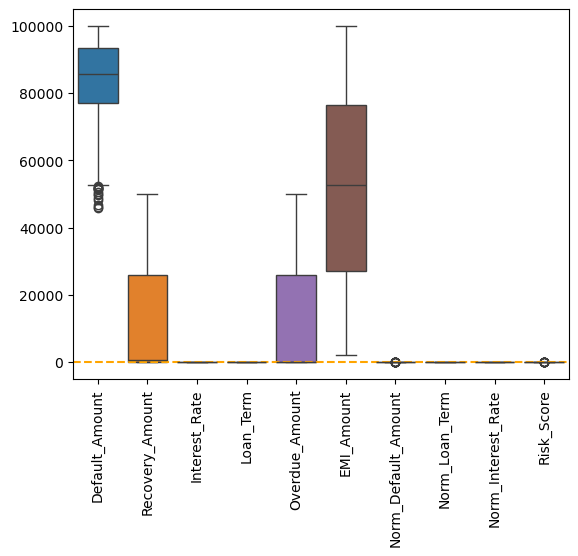

In [169]:
high_risk_threshold = op3["Risk_Score"].quantile(0.75)
high_risk_customers = op3[op3["Risk_Score"] >= high_risk_threshold]
new_df = high_risk_customers.drop('Loan_Amount',axis = 1)
sns.boxplot(new_df)
plt.xticks(rotation = 90)
plt.axhline(y=high_risk_threshold,linestyle = '--',color='orange',label="high_risk_threshold")
plt.show()

# 19. Time to Default Analysis

● Calculate the average time from loan disbursement to default for overdue
loans.
● Identify loan purposes with the shortest time to default.
● Compare the time to default across customer demographics.


In [125]:
# Merge pd_defaults with pd_loan to get disbursal date
pd_defaults_merged = pd.merge(pd_defaults, pd_loan[['Loan_ID', 'Disbursal_Date']], on='Loan_ID', how='left')

# Convert dates to datetime
pd_defaults_merged['Default_Date'] = pd.to_datetime(pd_defaults_merged['Default_Date'], errors='coerce')
pd_defaults_merged['Disbursal_Date'] = pd.to_datetime(pd_defaults_merged['Disbursal_Date'], errors='coerce')

# Calculate time to default in days
pd_defaults_merged['Time_to_Default'] = (pd_defaults_merged['Default_Date'] - pd_defaults_merged['Disbursal_Date']).dt.days

# Average time to default
average_time_to_default = pd_defaults_merged['Time_to_Default'].mean()

# Merge with pd_applications to get loan purpose
pd_defaults_with_purpose = pd.merge(pd_defaults_merged, pd_applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Average time to default by loan purpose
time_to_default_by_purpose = pd_defaults_with_purpose.groupby('Loan_Purpose')['Time_to_Default'].mean().sort_values()

# Merge with pd_customer to get demographics
pd_defaults_with_customer = pd.merge(pd_defaults_with_purpose, pd_customer[['Customer_ID', 'Gender', 'Age', 'Annual_Income']], on='Customer_ID', how='left')

# Average time to default by gender
time_to_default_by_gender = pd_defaults_with_customer.groupby('Gender')['Time_to_Default'].mean()

# Average time to default by income category
def categorize_income(income):
    if income < 500000:
        return 'Low'
    elif income < 1000000:
        return 'Medium'
    else:
        return 'High'

pd_defaults_with_customer['Income_Category'] = pd_defaults_with_customer['Annual_Income'].apply(categorize_income)
time_to_default_by_income = pd_defaults_with_customer.groupby('Income_Category')['Time_to_Default'].mean()

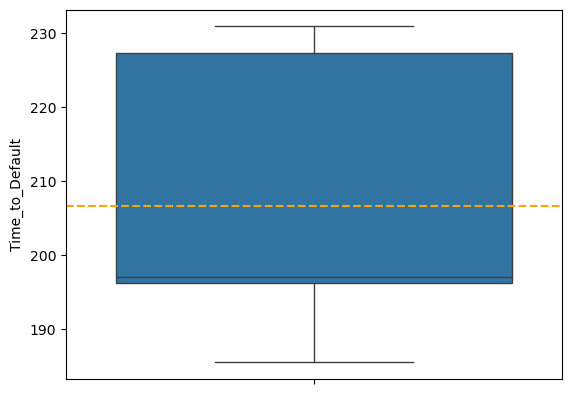

In [126]:
sns.boxplot(time_to_default_by_purpose)
plt.axhline(y=average_time_to_default,linestyle = '--',color='orange',label="average_time_to_default")
plt.show()

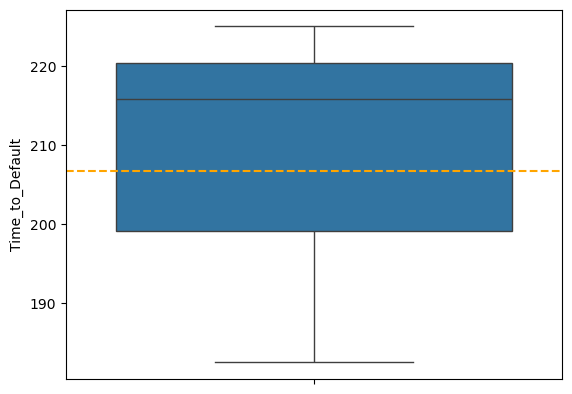

In [127]:
sns.boxplot(time_to_default_by_gender)
plt.axhline(y=average_time_to_default,linestyle = '--',color='orange',label="average_time_to_default")
plt.show()

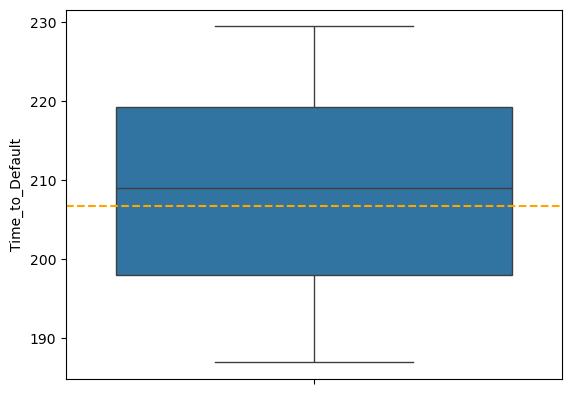

In [128]:
sns.boxplot(time_to_default_by_income)
plt.axhline(y=average_time_to_default,linestyle = '--',color='orange',label="average_time_to_default")
plt.show()

**RESULT:** 
* Average time to default is higher than average default loan reason.
* Average time to default is lower by average default by Gender.
* Average time to default is same as default by income.

# 20. Transaction Pattern Analysis

● Identify customers with irregular repayment patterns.
● Analyze penalty payments as a proportion of total transactions.
● Compare transaction amounts for overdue vs. non-overdue loans.

Customer with irregular repayment patterns (fewer than 2 EMI payments):
4756

Penalty payments as a proportion of total transaction amount: 50.06%

Average transaction amount by loan status:
Loan_Status
Active     25502.802129
Closed     25496.166516
Overdue    25490.255176
Name: Amount, dtype: float64


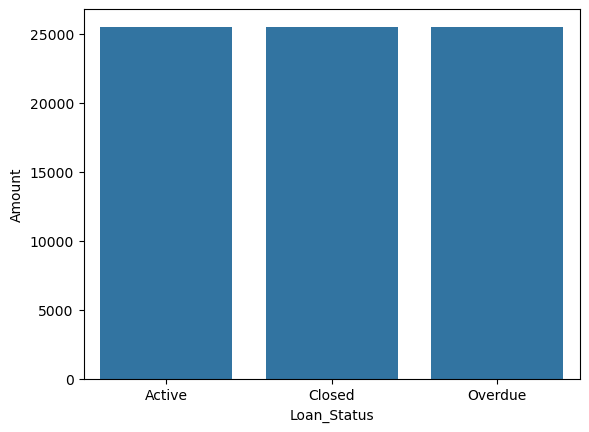

In [173]:

# 1. Identify pd_customer with irregular repayment patterns
# Count number of EMI payments per customer
emi_counts = pd_transaction[pd_transaction['Payment_Type'] == 'EMI'].groupby('Customer_ID').size()

# Identify pd_customer with fewer than 2 EMI payments as irregular (example threshold)
irregular_pd_customer = emi_counts[emi_counts < 2].count()

# 2. Analyze penalty payments as a proportion of total pd_transaction
total_transaction_amount = pd_transaction['Amount'].sum()
penalty_amount = pd_transaction[pd_transaction['Payment_Type'] == 'Penalty']['Amount'].sum()
penalty_proportion = penalty_amount / total_transaction_amount if total_transaction_amount else 0

# 3. Compare transaction amounts for overdue vs. non-overdue pd_loan
# Merge pd_transaction with loan status
pd_transaction_merged = pd_transaction.merge(pd_loan[['Loan_ID', 'Loan_Status']], on='Loan_ID', how='left')

# Calculate average transaction amount for each loan status
avg_transaction_by_status = pd_transaction_merged.groupby('Loan_Status')['Amount'].mean()

# Output results
print("Customer with irregular repayment patterns (fewer than 2 EMI payments):")
print(irregular_pd_customer)
print("\nPenalty payments as a proportion of total transaction amount: {:.2%}".format(penalty_proportion))
print("\nAverage transaction amount by loan status:")
print(avg_transaction_by_status)

sns.barplot(avg_transaction_by_status)
plt.show()


# Important Result:

1) **Customer Feedback** Voice of customer is missing. Which will help to analyse the Loans better.
2) **Manager Count** Relationship managers count seems to have slight corelation with default rates. If managers feedback and traning details might help to further analyse default rates and managers.
3) **Loan Distribution** Each region covers the region to distribute loan in equal quantity. Recovery by region's loan distribution data.
4) **Skewness** Loan Distribution across the regions are normal distribution and there are no skewness in the data. Each Region have similar credit score of customers. So Credit score don't change out come of loan repayment. When comparing it with recovery_status. we have very few Fully paid loans and not paid loans are equally higher compared to partial payment. This must be due to other values.
5) **Correlation Aalysis** : Based on headmap and corr_matrix Loan amount and Default amount have weak with negative correlation.This suggests that other factors, possibly related to customer behavior or external economic conditions, may play a more significant role in determining defaults.
6) Found Positive Correlation for Relationship Manager count for that region and defaults. East Region is highest affected where recovery could be improved by increasing managers count. West Regions recovery is Better, Hence new products can be introduced here.
7) **Credit Score** Surprising result is recovery rate is least in the category of High Salary and High credit score.
8) **Correlation Analysis** The correlations between Credit_Score, Loan_Amount, Interest_Rate, and Overdue_Amount are very weak, indicating that these values don't have a strong relationships with each other. As a result We need to look for other factors may affect a more significant value in determining default risks and repayment behavior. Such a Default Reason
9) **Default Analysis**: Based on Default reason each reason category have equal chances of defaulting again. Loan recovery is highest after taking legal action is 24.4% for Business Loss Category. Time to default is more aligned wtih Income and least aligned with category.
10) **EMI** EMI is neither positively or negatively corelated with region, defaults,EMI bins and Loan Types. Default don't depend on EMI.
11) **Application** Approval Rate: 84.75% Rejection Rate: 15.25%. Rejection category is equally distributed around 33 % for credit score, documents and source of Income Average Processing Fee for Approved Applications: 5252.395014285714 is equal to Average Processing Fee for Rejected Applications: 5255.141587301588. Number of Applcations are highest among the month of January , July and December.
12) **Recovery** Overall Recovery Ratio: 24.31% Recovery Rates by Legal Action: Legal_Action No = 24.14 and Yes = 24.48. Legal Action seems to have 0.34% higher chance of recovery.
13) **Processing Time** Loan processing time is highest for North Region.
14) **Profits** Profit across each loan purpose category is uniformly distributed. Profit across regions are uniformly distributed at 16 %
15) **Monthly Trends** Default is highest in November and December on average in a given year.
16) **Branch** Branches in North region take more time to process the loans. Branch 2120 have highes frequency of 16 times rejecting an application. Loan disbursement is around the mean of 1200 loans per year by each branch.
17) **Approvals** Loan approval and rejection is same region, gender and income wise. This tells us the process of loan approval is followed very strictly by the org.
18) **Outliers based on Risk** The defaults have highest outliers and higher then recommended risk score. Loan amount is also higher.
19) ** Transaction Analysis** Customer with irregular repayment patterns (fewer than 2 EMI payments): 4756 Penalty payments as a proportion of total transaction amount: 50.06% Average transaction amount by loan status: Loan_Status Active     25502.802129|Closed     25496.166516|Overdue    25490.255176